In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Импорт и обработка данных

Импортируй датафрейм *taxi_orders.csv* и исполни ячейки ниже, чтобы привести временные метки к нужному формату.

In [326]:
df = pd.read_csv('taxi_orders.csv')

In [327]:
df['order_dttm'] = pd.to_datetime(df['order_dttm'])
df['offer_dttm'] = pd.to_datetime(df['offer_dttm'])
df['assign_dttm'] = pd.to_datetime(df['assign_dttm'])
df['arrive_dttm'] = pd.to_datetime(df['arrive_dttm'])
df['trip_dttm'] = pd.to_datetime(df['trip_dttm'])

In [328]:
df.tail()


,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,flag_offer,flag_assign,flag_arrive,flag_trip
214570,ORD214571,CL38097,55.405143,37.902103,2025-03-31 23:21:07,2025-03-31 23:21:22,NaT,NaT,NaT,dmo,1,0,0,0
214571,ORD214572,CL45647,55.408913,37.894055,2025-03-31 23:21:13,2025-03-31 23:21:28,NaT,NaT,NaT,dmo,1,0,0,0
214572,ORD214573,CL20483,55.411061,37.904514,2025-03-31 23:09:00,NaT,NaT,NaT,NaT,dmo,0,0,0,0
214573,ORD214574,CL43563,55.418311,37.896651,2025-03-31 23:13:00,2025-03-31 23:13:14,NaT,NaT,NaT,dmo,1,0,0,0
214574,ORD214575,CL29727,55.409326,37.893884,2025-03-31 23:45:52,2025-03-31 23:46:07,2025-03-31 23:46:48,2025-03-31 23:56:48,2025-04-01 00:22:27,dmo,1,1,1,1


# Задание 1. Временная сегментация

## Визуализация основных метрик по дням

### **Подготовь необходимые группировки и переменные для визуализации**

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214575 entries, 0 to 214574
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_order     214575 non-null  object        
 1   id_client    214575 non-null  object        
 2   lat          214575 non-null  float64       
 3   long         214575 non-null  float64       
 4   order_dttm   214575 non-null  datetime64[ns]
 5   offer_dttm   188011 non-null  datetime64[ns]
 6   assign_dttm  68057 non-null   datetime64[ns]
 7   arrive_dttm  53880 non-null   datetime64[ns]
 8   trip_dttm    50446 non-null   datetime64[ns]
 9   label        214575 non-null  object        
 10  flag_offer   214575 non-null  int64         
 11  flag_assign  214575 non-null  int64         
 12  flag_arrive  214575 non-null  int64         
 13  flag_trip    214575 non-null  int64         
dtypes: datetime64[ns](5), float64(2), int64(4), object(3)
memory usage: 22.9+ MB


In [330]:
df.isna().sum()

df.dropna(inplace=True)

In [331]:
df.isna().sum()

,0
id_order,0
id_client,0
lat,0
long,0
order_dttm,0
offer_dttm,0
assign_dttm,0
arrive_dttm,0
trip_dttm,0
label,0


## DST

In [332]:
### Твоё решение здесь
df['DST'] = df['offer_dttm'] - df['order_dttm']
df['DST']


,DST
0,0 days 00:00:30
1,0 days 00:00:30
2,0 days 00:00:30
3,0 days 00:00:31
4,0 days 00:00:30
...,...
214547,0 days 00:00:13
214554,0 days 00:00:15
214557,0 days 00:00:13
214565,0 days 00:00:13


In [333]:
df['DST'] = df['DST'].dt.total_seconds()
df['DST']

,DST
0,30.0
1,30.0
2,30.0
3,31.0
4,30.0
...,...
214547,13.0
214554,15.0
214557,13.0
214565,13.0


## AT

In [334]:
df.head()

,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,flag_offer,flag_assign,flag_arrive,flag_trip,DST
0,ORD000001,CL15248,55.911191,37.641922,2025-03-01 07:08:47,2025-03-01 07:09:17,2025-03-01 07:09:47,2025-03-01 07:13:00,2025-03-01 07:33:55,normal,1,1,1,1,30.0
1,ORD000002,CL18211,55.706958,37.615656,2025-03-01 06:45:41,2025-03-01 06:46:11,2025-03-01 06:46:46,2025-03-01 06:51:24,2025-03-01 07:20:37,normal,1,1,1,1,30.0
2,ORD000003,CL24808,55.920046,37.860554,2025-03-01 10:06:05,2025-03-01 10:06:35,2025-03-01 10:07:19,2025-03-01 10:12:26,2025-03-01 10:26:57,normal,1,1,1,1,30.0
3,ORD000004,CL06620,55.898731,37.694480,2025-03-01 20:39:56,2025-03-01 20:40:27,2025-03-01 20:41:06,2025-03-01 20:44:16,2025-03-01 21:06:09,normal,1,1,1,1,31.0
4,ORD000005,CL47785,55.608433,37.755467,2025-03-01 11:10:23,2025-03-01 11:10:53,2025-03-01 11:11:42,2025-03-01 11:15:15,2025-03-01 11:57:42,normal,1,1,1,1,30.0


In [335]:
### Твоё решение здесь
df['AT'] = df['assign_dttm'] - df['offer_dttm']
df['AT'] = df['AT'].dt.total_seconds()
df['AT']

,AT
0,30.0
1,35.0
2,44.0
3,39.0
4,49.0
...,...
214547,36.0
214554,30.0
214557,43.0
214565,34.0


## ETA



In [336]:
df['ETA'] = df['arrive_dttm'] - df['assign_dttm']
df['ETA'] = df['ETA'].dt.total_seconds()
df['ETA']

,ETA
0,193.0
1,278.0
2,307.0
3,190.0
4,213.0
...,...
214547,439.0
214554,469.0
214557,426.0
214565,417.0


## TT

In [337]:
df['TT'] = df['trip_dttm'] - df['arrive_dttm']
df['TT'] = df['TT'].dt.total_seconds()
df['TT']

,TT
0,1255.0
1,1753.0
2,871.0
3,1313.0
4,2547.0
...,...
214547,744.0
214554,3141.0
214557,986.0
214565,1287.0


In [338]:
def fmt_seconds(s):
    s = int(s)
    h, rem = divmod(s, 3600)
    m, sec = divmod(rem, 60)
    if h > 0:
        return f"{h}:{m:02d}:{sec:02d}"
    elif m > 0:
        return f"{m}:{sec:02d}"
    else:
        return f"{sec}s"

In [339]:
df['DST'] = df['DST'].apply(fmt_seconds)
df['AT'] = df['AT'].apply(fmt_seconds)
df['ETA'] = df['ETA'].apply(fmt_seconds)
df['TT'] = df['TT'].apply(fmt_seconds)

df.head()

,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,flag_offer,flag_assign,flag_arrive,flag_trip,DST,AT,ETA,TT
0,ORD000001,CL15248,55.911191,37.641922,2025-03-01 07:08:47,2025-03-01 07:09:17,2025-03-01 07:09:47,2025-03-01 07:13:00,2025-03-01 07:33:55,normal,1,1,1,1,30s,30s,3:13,20:55
1,ORD000002,CL18211,55.706958,37.615656,2025-03-01 06:45:41,2025-03-01 06:46:11,2025-03-01 06:46:46,2025-03-01 06:51:24,2025-03-01 07:20:37,normal,1,1,1,1,30s,35s,4:38,29:13
2,ORD000003,CL24808,55.920046,37.860554,2025-03-01 10:06:05,2025-03-01 10:06:35,2025-03-01 10:07:19,2025-03-01 10:12:26,2025-03-01 10:26:57,normal,1,1,1,1,30s,44s,5:07,14:31
3,ORD000004,CL06620,55.898731,37.694480,2025-03-01 20:39:56,2025-03-01 20:40:27,2025-03-01 20:41:06,2025-03-01 20:44:16,2025-03-01 21:06:09,normal,1,1,1,1,31s,39s,3:10,21:53
4,ORD000005,CL47785,55.608433,37.755467,2025-03-01 11:10:23,2025-03-01 11:10:53,2025-03-01 11:11:42,2025-03-01 11:15:15,2025-03-01 11:57:42,normal,1,1,1,1,30s,49s,3:33,42:27


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50446 entries, 0 to 214574
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_order     50446 non-null  object        
 1   id_client    50446 non-null  object        
 2   lat          50446 non-null  float64       
 3   long         50446 non-null  float64       
 4   order_dttm   50446 non-null  datetime64[ns]
 5   offer_dttm   50446 non-null  datetime64[ns]
 6   assign_dttm  50446 non-null  datetime64[ns]
 7   arrive_dttm  50446 non-null  datetime64[ns]
 8   trip_dttm    50446 non-null  datetime64[ns]
 9   label        50446 non-null  object        
 10  flag_offer   50446 non-null  int64         
 11  flag_assign  50446 non-null  int64         
 12  flag_arrive  50446 non-null  int64         
 13  flag_trip    50446 non-null  int64         
 14  DST          50446 non-null  object        
 15  AT           50446 non-null  object        
 16  ETA     

### **Визуализируй конверсии по дням**

In [341]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [342]:

dt_cols = ['order_dttm','offer_dttm','assign_dttm','arrive_dttm','trip_dttm']
for c in dt_cols:
    df[c] = pd.to_datetime(df[c])

# универсальная функция парсинга строк форматов: "30s", "3:13", "01:02:03", "30"
def parse_time_to_seconds(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        return int(x)
    s = str(x).strip()
    # формат с суффиксом "s"
    m = re.fullmatch(r'(\d+)\s*s', s)
    if m:
        return int(m.group(1))
    # формат H:M:S или M:SS
    parts = s.split(':')
    if len(parts) == 3:
        h, mm, ss = parts
        return int(h)*3600 + int(mm)*60 + int(ss)
    if len(parts) == 2:
        mm, ss = parts
        return int(mm)*60 + int(ss)
    # просто число
    if s.isdigit():
        return int(s)
    # fallback: try float
    try:
        return int(float(s))
    except:
        return np.nan

# создаём числовые секунды для всех нужных колонок
for col in ['DST','AT','ETA','TT']:
    if col in df.columns:
        df[f'{col}_s'] = df[col].apply(parse_time_to_seconds).astype('float')  # float for NaN

In [343]:
### Твоё решение здесь
df['day'] = df['offer_dttm'].dt.date
df['day']

,day
0,2025-03-01
1,2025-03-01
2,2025-03-01
3,2025-03-01
4,2025-03-01
...,...
214547,2025-03-31
214554,2025-03-31
214557,2025-03-31
214565,2025-03-31


In [344]:
# Функция, агрегирующая статистики и формирующая метрики
def df_conv_aggregate(df):
  df['day'] = df['offer_dttm'].dt.normalize()

  # если flags не 0/1 — приведём
  for f in ['flag_offer','flag_assign','flag_arrive','flag_trip']:
    if f in df.columns:
        df[f] = df[f].astype(int)

  # убеждаемся, что datetime
  df['offer_dttm'] = pd.to_datetime(df['offer_dttm'])
  # нормализуем до даты (00:00:00)
  df['day_dt'] = df['offer_dttm'].dt.normalize()

  # агрегируем флаги и считаем конверсии
  daily_flags = df.groupby('day_dt')[['flag_offer','flag_assign','flag_arrive','flag_trip']].sum().rename(columns={
    'flag_offer':'offers','flag_assign':'assigns','flag_arrive':'arrives','flag_trip':'trips'
  })
  daily_flags['conv_assign_from_offer']  = daily_flags['assigns'] / daily_flags['offers']
  daily_flags['conv_arrive_from_assign'] = daily_flags['arrives'] / daily_flags['assigns']
  daily_flags['conv_trip_from_arrive']   = daily_flags['trips'] / daily_flags['arrives']

  daily = daily_flags.reset_index().sort_values('day_dt')

  # статистики по временным метрикам (mean, median, std, count)
  agg_time = df.groupby('day').agg({
    'DST_s': ['count','mean','median','std'],
    'AT_s':  ['count','mean','median','std'],
    'ETA_s': ['count','mean','median','std'],
    'TT_s':  ['count','mean','median','std']
  })
  # упростим колонки
  agg_time.columns = ['_'.join(col).strip() for col in agg_time.columns.values]

  daily = daily_flags.join(agg_time)
  daily = daily.reset_index()
  return daily

In [345]:
# Таблица с формированными конверсиями и метриками
daily = df_conv_aggregate(df)
daily.head()

,day_dt,offers,assigns,arrives,trips,conv_assign_from_offer,conv_arrive_from_assign,conv_trip_from_arrive,DST_s_count,DST_s_mean,...,AT_s_median,AT_s_std,ETA_s_count,ETA_s_mean,ETA_s_median,ETA_s_std,TT_s_count,TT_s_mean,TT_s_median,TT_s_std
0,2025-03-01,1858,1858,1858,1858,1.0,1.0,1.0,1858,110.789559,...,40.0,5.995584,1858,466.336383,495.0,206.609667,1858,2019.008073,2002.0,934.852486
1,2025-03-02,2087,2087,2087,2087,1.0,1.0,1.0,2087,120.099185,...,40.0,6.147010,2087,459.403929,471.0,210.188796,2087,2001.141351,1990.0,929.229847
2,2025-03-03,2042,2042,2042,2042,1.0,1.0,1.0,2042,125.780118,...,40.0,6.011064,2042,471.722821,490.0,212.951905,2042,2009.914789,2040.5,938.423300
3,2025-03-04,1777,1777,1777,1777,1.0,1.0,1.0,1777,122.677546,...,40.0,5.992777,1777,483.797411,507.0,206.141623,1777,2039.316263,1995.0,928.465758
4,2025-03-05,1840,1840,1840,1840,1.0,1.0,1.0,1840,122.265761,...,40.0,5.972094,1840,474.030978,488.5,214.303218,1840,2037.538587,2061.0,932.442191


In [346]:
def visualize_conv_by_day(daily):
  daily['day_of_month'] = daily['day_dt'].dt.day
  daily = daily.sort_values('day_of_month')

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(9, 6), sharex=True)

  # 1) Объём заказов
  sns.barplot(x='day_of_month', y='offers', data=daily, color='lightblue', ax=ax1)
  ax1.set_title('Число заказов по дням')
  ax1.set_ylabel('Offers')

  # 2) Конверсии
  sns.lineplot(x='day_of_month', y='conv_assign_from_offer',
              data=daily, marker='o', ax=ax2,
              label='assign / offer', color='C1')

  ax2.set_title('Конверсия: Assign_from_offer')
  ax2.set_xlabel('День месяца')
  ax2.set_ylabel('Rate')
  ax2.set_ylim(0, 1.05)
  ax2.legend()

  sns.lineplot(x='day_of_month', y='conv_arrive_from_assign',
              data=daily, marker='o', ax=ax3, label='arrive / assign',
              alpha=0.7, color='C2')
  ax3.set_title('Конверсия: Arrive from assign')
  ax3.set_xlabel('День месяца')
  ax3.set_ylabel('Rate')
  ax3.set_ylim(0, 1.05)
  ax3.legend()

  sns.lineplot(x='day_of_month', y='conv_trip_from_arrive',
              data=daily, marker='o', ax=ax4, label='trip / arrive',
              alpha=0.7, color='C3')
  ax4.set_title('Конверсия: Trip from arrive')
  ax4.set_xlabel('День месяца')
  ax4.set_ylabel('Rate')
  ax4.set_ylim(0, 1.05)
  ax4.legend()

  plt.tight_layout()
  plt.show()

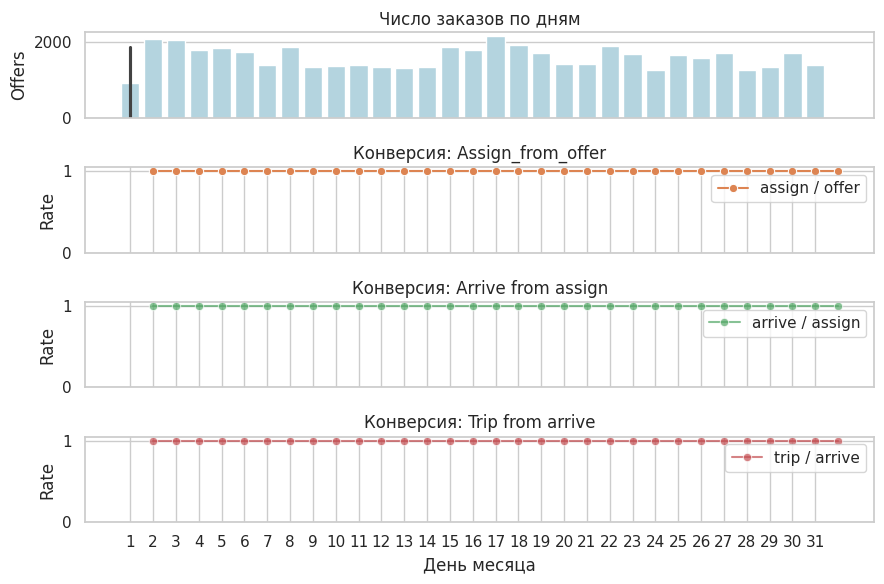

In [347]:
# Визуализируем
visualize_conv_by_day(daily)

### **Визуализируй DST по дням**

In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')

# уверимся в datetime
for c in ['order_dttm','offer_dttm','assign_dttm','arrive_dttm','trip_dttm']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c])

# если не делали ранее — парсим строковые форматы в секунды (функция из ранних сообщений)
import re
def parse_time_to_seconds(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float, np.integer, np.floating)):
        return int(x)
    s = str(x).strip()
    m = re.fullmatch(r'(\d+)\s*s', s)
    if m:
        return int(m.group(1))
    parts = s.split(':')
    if len(parts) == 3:
        h, mm, ss = parts
        return int(h)*3600 + int(mm)*60 + int(ss)
    if len(parts) == 2:
        mm, ss = parts
        return int(mm)*60 + int(ss)
    if s.isdigit():
        return int(s)
    try:
        return int(float(s))
    except:
        return np.nan

for col in ['DST','AT','ETA','TT']:
    if col in df.columns:
        df[f'{col}_s'] = df[col].apply(parse_time_to_seconds).astype('float')

# day и hour для группировок (используем offer_dttm как основной reference; можно сменить)
df['day_dt'] = df['offer_dttm'].dt.normalize()
df['day_of_month'] = df['offer_dttm'].dt.day
df['day_idx'] = (df['day_dt'].sort_values().rank(method='dense').astype(int))  # sequential index (1..)
df['hour'] = df['offer_dttm'].dt.hour

# привести флаги к int
for f in ['flag_offer','flag_assign','flag_arrive','flag_trip']:
    if f in df.columns:
        df[f] = df[f].astype(int)

In [349]:
### Твоё решение здесь
daily_flags = df.groupby('day_dt')[['flag_offer','flag_assign','flag_arrive','flag_trip']].sum().rename(columns={
    'flag_offer':'offers','flag_assign':'assigns','flag_arrive':'arrives','flag_trip':'trips'
})
daily_flags['conv_assign_from_offer']  = daily_flags['assigns'] / daily_flags['offers']
daily_flags['conv_arrive_from_assign'] = daily_flags['arrives'] / daily_flags['assigns']
daily_flags['conv_trip_from_arrive']   = daily_flags['trips'] / daily_flags['arrives']

daily_time = df.groupby('day_dt').agg({
    'DST_s': ['count','mean','median','std'],
    'AT_s':  ['count','mean','median','std'],
    'ETA_s': ['count','mean','median','std'],
    'TT_s':  ['count','mean','median','std']
})
daily_time.columns = ['_'.join(c).strip() for c in daily_time.columns.values]

daily = daily_flags.join(daily_time).reset_index().sort_values('day_dt')
daily['day_idx'] = range(1, len(daily)+1)  # sequential 1..N

In [350]:
daily

,day_dt,offers,assigns,arrives,trips,conv_assign_from_offer,conv_arrive_from_assign,conv_trip_from_arrive,DST_s_count,DST_s_mean,...,AT_s_std,ETA_s_count,ETA_s_mean,ETA_s_median,ETA_s_std,TT_s_count,TT_s_mean,TT_s_median,TT_s_std,day_idx
0,2025-03-01,1858,1858,1858,1858,1.0,1.0,1.0,1858,110.789559,...,5.995584,1858,466.336383,495.0,206.609667,1858,2019.008073,2002.0,934.852486,1
1,2025-03-02,2087,2087,2087,2087,1.0,1.0,1.0,2087,120.099185,...,6.147010,2087,459.403929,471.0,210.188796,2087,2001.141351,1990.0,929.229847,2
2,2025-03-03,2042,2042,2042,2042,1.0,1.0,1.0,2042,125.780118,...,6.011064,2042,471.722821,490.0,212.951905,2042,2009.914789,2040.5,938.423300,3
3,2025-03-04,1777,1777,1777,1777,1.0,1.0,1.0,1777,122.677546,...,5.992777,1777,483.797411,507.0,206.141623,1777,2039.316263,1995.0,928.465758,4
4,2025-03-05,1840,1840,1840,1840,1.0,1.0,1.0,1840,122.265761,...,5.972094,1840,474.030978,488.5,214.303218,1840,2037.538587,2061.0,932.442191,5
5,2025-03-06,1722,1722,1722,1722,1.0,1.0,1.0,1722,115.973287,...,6.079231,1722,473.708479,495.0,203.966700,1722,2059.723577,2103.5,939.032670,6
6,2025-03-07,1398,1398,1398,1398,1.0,1.0,1.0,1398,109.256795,...,6.122863,1398,502.989986,526.0,196.589791,1398,2025.899142,1987.5,926.584990,7
7,2025-03-08,1873,1873,1873,1873,1.0,1.0,1.0,1873,223.577683,...,6.131603,1873,619.777363,596.0,270.864848,1873,2037.231180,2002.0,920.025214,8
8,2025-03-09,1334,1334,1334,1334,1.0,1.0,1.0,1334,85.020990,...,5.993230,1334,490.050975,511.5,194.829882,1334,2082.565217,2106.5,936.533739,9
9,2025-03-10,1366,1366,1366,1366,1.0,1.0,1.0,1366,88.041728,...,5.926803,1366,492.011713,517.0,191.921053,1366,2076.710835,2083.5,913.349224,10


In [351]:
def plot_metrics(daily: pd.DataFrame, metric_type: str = "TT"):
  if metric_type == 'DST':
    # mean ± std линия
    plt.figure(figsize=(8,4))
    ax = plt.gca()
    ax2 = ax.twinx()

    ax.bar(daily.index, daily['DST_s_count'], color='lightgray', alpha=0.6, label='count (DST samples)')
    ax.set_ylabel('Count')

    ax_line = ax2
    ax_line.plot(daily.index, daily['DST_s_mean'], marker='o', color='C0', label='DST mean (s)')
    ax_line.fill_between(daily['day_idx'],
                        daily['DST_s_mean'] - daily['DST_s_std'],
                        daily['DST_s_mean'] + daily['DST_s_std'],
                        color='C0', alpha=0.15)
    ax_line.set_ylabel('DST (s)')
    ax_line.set_xlabel('День')
    # plt.xticks(daily.index, daily['day_dt'].dt.strftime('%Y-%m-%d'), rotation=45)
    ax_line.legend(loc='upper left')
    ax.legend(loc='upper right')
    plt.title('DST-метрика по дням (mean ± std)')
    plt.tight_layout()
    plt.show()

    # boxplot (raw values)
    plt.figure(figsize=(8,4))
    sns.boxplot(x='day_of_month', y='DST_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel('День')
    plt.ylabel('DST (s)')
    plt.title('DST-метрика по дням (boxplot)')
    plt.tight_layout()
    plt.show()
  elif metric_type == 'AT':
    ### Твоё решение здесь
    # mean ± std
    plt.figure(figsize=(8,4))
    plt.plot(daily.index, daily['AT_s_mean'], marker='o', color='C1', label='AT mean (s)')
    plt.fill_between(daily['day_idx'],
                    daily['AT_s_mean'] - daily['AT_s_std'],
                    daily['AT_s_mean'] + daily['AT_s_std'],
                    color='C1', alpha=0.15)
    # plt.xticks(daily.index, daily['day_dt'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.xlabel('День'); plt.ylabel('сек.'); plt.title('Assign-Time-метрика (AT) по дням'); plt.legend()
    plt.tight_layout(); plt.show()

     # boxplot (raw values)
    plt.figure(figsize=(8,4))
    sns.boxplot(x='day_of_month', y='AT_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel('День')
    plt.ylabel('AT (s)')
    plt.title('AT-метрика по дням (boxplot)')
    plt.tight_layout()
    plt.show()
  elif metric_type == 'ETA':
    ### Твоё решение здесь
    plt.figure(figsize=(8,4))
    plt.plot(daily.index, daily['ETA_s_mean'], marker='o', color='C2', label='ETA mean (s)')
    plt.fill_between(daily['day_idx'],
                    daily['ETA_s_mean'] - daily['ETA_s_std'],
                    daily['ETA_s_mean'] + daily['ETA_s_std'],
                    color='C2', alpha=0.15)
    # plt.xticks(daily.index, daily['day_dt'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.xlabel('День'); plt.ylabel('сек.'); plt.title('ETA-метрика по дням'); plt.legend()
    plt.tight_layout(); plt.show()

     # boxplot (raw values)
    plt.figure(figsize=(8,4))
    sns.boxplot(x='day_of_month', y='ETA_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel('День')
    plt.ylabel('ETA (s)')
    plt.title('ETA-метрика по дням (boxplot)')
    plt.tight_layout()
    plt.show()
  else:
    ### Твоё решение здесь
    plt.figure(figsize=(8,4))
    plt.plot(daily['day_idx'], daily['TT_s_mean'], marker='o', color='C3', label='TT mean (s)')
    plt.fill_between(daily['day_idx'],
                    daily['TT_s_mean'] - daily['TT_s_std'],
                    daily['TT_s_mean'] + daily['TT_s_std'],
                    color='C3', alpha=0.15)
    # plt.xticks(daily['day_idx'], daily['day_dt'].dt.strftime('%Y-%m-%d'), rotation=45)
    plt.xlabel('День'); plt.ylabel('сек.'); plt.title('Trip-Time-метрика (TT) по дням'); plt.legend()
    plt.tight_layout(); plt.show()

     # boxplot (raw values)
    plt.figure(figsize=(8,4))
    sns.boxplot(x='day_of_month', y='TT_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel('День')
    plt.ylabel('TT (s)')
    plt.title('TT-метрика по дням (boxplot)')
    plt.tight_layout()
    plt.show()

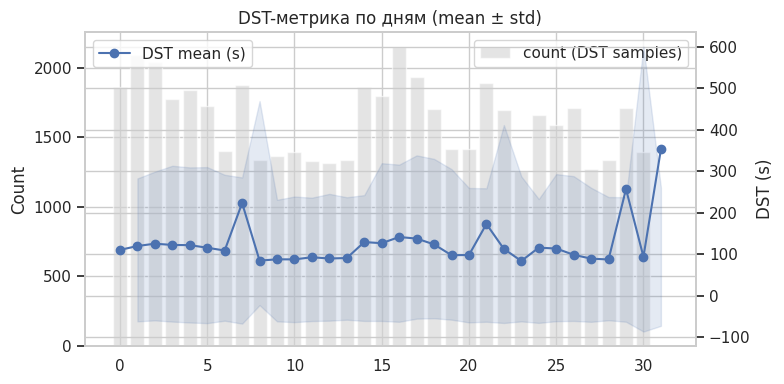

/tmp/ipython-input-3117145851.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_month', y='DST_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')


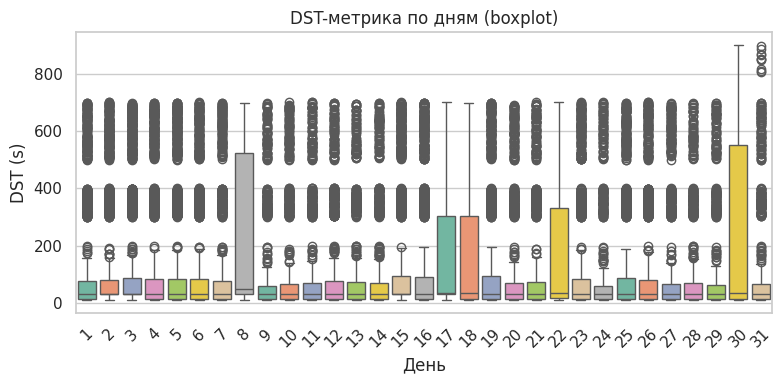

In [352]:
plot_metrics(daily, "DST")

### **Визуализируй Assign Time по дням**

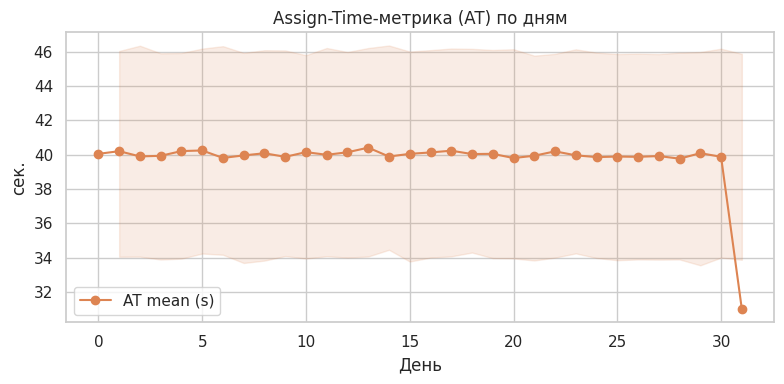

/tmp/ipython-input-3117145851.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_month', y='AT_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')


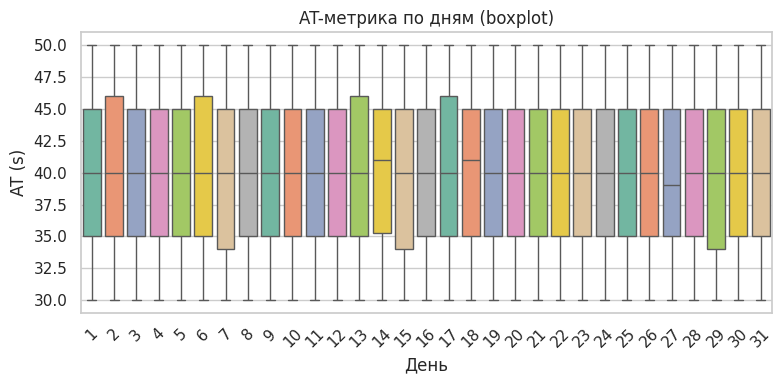

In [353]:
plot_metrics(daily, "AT")

### **Визуализируй ETA по дням**

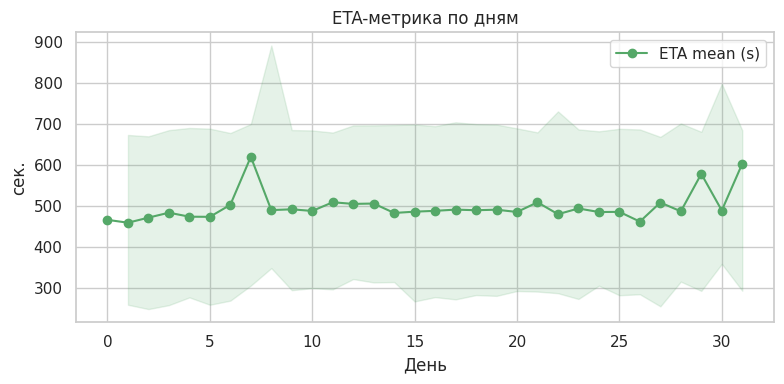

/tmp/ipython-input-3117145851.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_month', y='ETA_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')


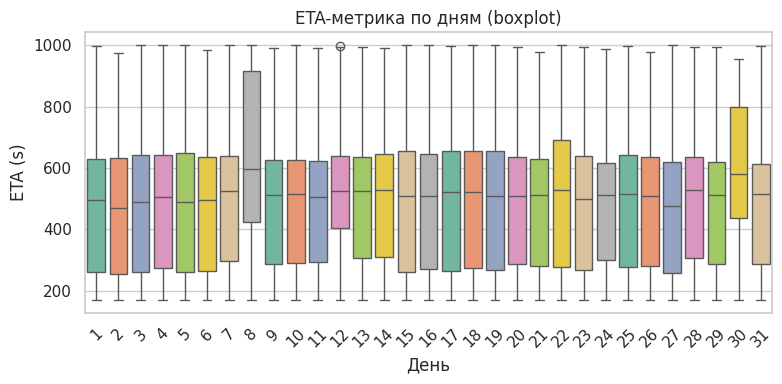

In [354]:
plot_metrics(daily, "ETA")

### **Визуализируй Trip Time по дням**

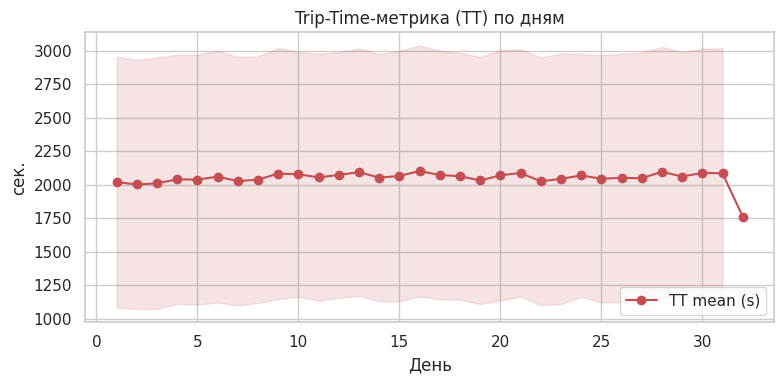

/tmp/ipython-input-3117145851.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_month', y='TT_s', data=df.merge(daily[['day_dt','day_idx']], on='day_dt'), palette='Set2')


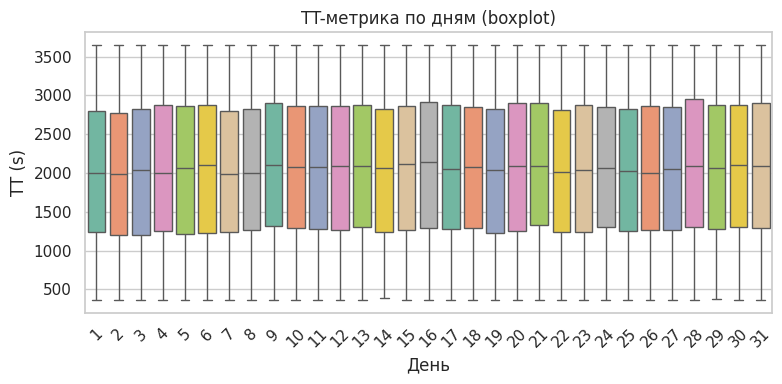

In [355]:
plot_metrics(daily, "TT")

## Визуализация по суточным часам

### **Подготовь необходимые группировки и переменные для визуализации**

In [356]:
### Твоё решение здесь
hourly_flags = df.groupby('hour')[['flag_offer','flag_assign','flag_arrive','flag_trip']].sum().rename(columns={
    'flag_offer':'offers','flag_assign':'assigns','flag_arrive':'arrives','flag_trip':'trips'
})
hourly_flags['conv_assign_from_offer']  = hourly_flags['assigns'] / hourly_flags['offers']
hourly_flags['conv_arrive_from_assign'] = hourly_flags['arrives'] / hourly_flags['assigns']
hourly_flags['conv_trip_from_arrive']   = hourly_flags['trips'] / hourly_flags['arrives']

hourly_time = df.groupby('hour').agg({
    'DST_s': ['count','mean','median','std'],
    'AT_s':  ['count','mean','median','std'],
    'ETA_s': ['count','mean','median','std'],
    'TT_s':  ['count','mean','median','std']
})
hourly_time.columns = ['_'.join(c).strip() for c in hourly_time.columns.values]

hourly = hourly_flags.join(hourly_time).reset_index().sort_values('hour')

### **Визуализируй конверсии по часам**

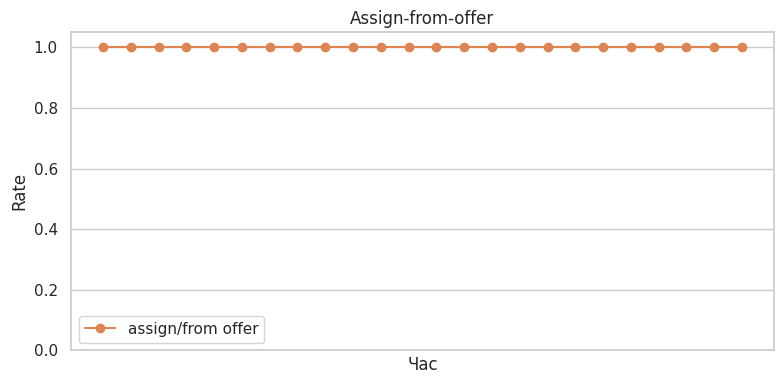

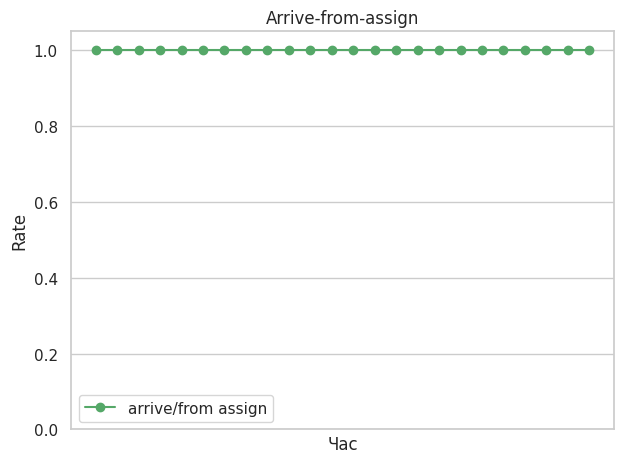

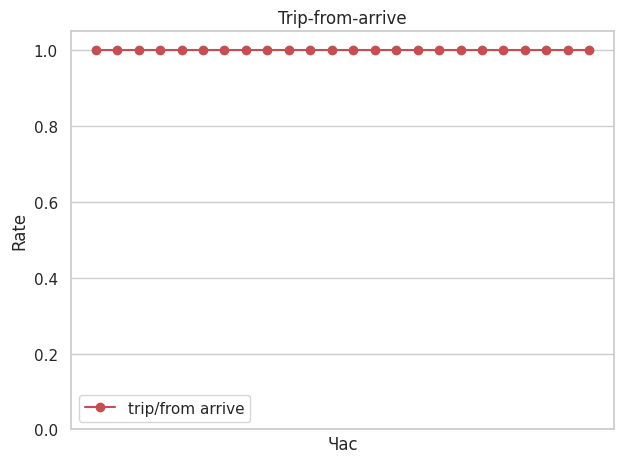

In [357]:
### Твоё решение здесь

plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['conv_assign_from_offer'], marker='o', label='assign/from offer', color='C1')
plt.xlabel('Час')
plt.ylabel('Rate')
plt.ylim(0,1.05)
plt.xticks(range(8,4))
plt.grid(True); plt.legend(); plt.title('Assign-from-offer'); plt.tight_layout(); plt.show()

plt.plot(hourly['hour'], hourly['conv_arrive_from_assign'], marker='o', label='arrive/from assign', color='C2')
plt.xlabel('Час')
plt.ylabel('Rate')
plt.ylim(0,1.05)
plt.xticks(range(8,4))
plt.grid(True); plt.legend(); plt.title('Arrive-from-assign'); plt.tight_layout(); plt.show()

plt.plot(hourly['hour'], hourly['conv_trip_from_arrive'], marker='o', label='trip/from arrive', color='C3')
plt.xlabel('Час')
plt.ylabel('Rate')
plt.ylim(0,1.05)
plt.xticks(range(8,4))
plt.grid(True); plt.legend(); plt.title('Trip-from-arrive'); plt.tight_layout(); plt.show()

### **Визуализируй DST по часам**

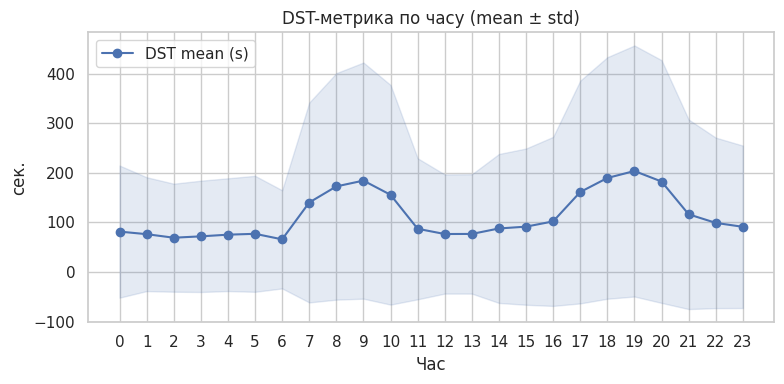

/tmp/ipython-input-4009316179.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='DST_s', data=df, order=range(0,24), palette='Set2')


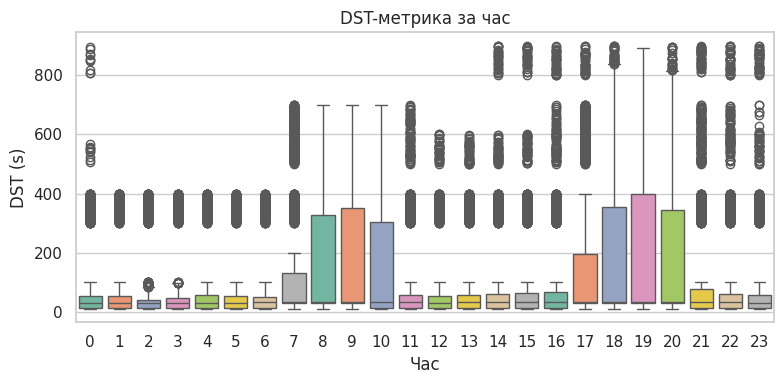

In [358]:
### Твоё решение здесь
plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['DST_s_mean'], marker='o', color='C0', label='DST mean (s)')
plt.fill_between(hourly['hour'],
                 hourly['DST_s_mean'] - hourly['DST_s_std'],
                 hourly['DST_s_mean'] + hourly['DST_s_std'],
                 color='C0', alpha=0.15)
plt.xlabel('Час'); plt.ylabel('сек.'); plt.title('DST-метрика по часу (mean ± std)'); plt.xticks(range(0,24)); plt.legend(); plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='hour', y='DST_s', data=df, order=range(0,24), palette='Set2')
plt.xlabel('Час'); plt.ylabel('DST (s)'); plt.title('DST-метрика за час'); plt.tight_layout(); plt.show()


### **Визуализируй Assign Time по часам**

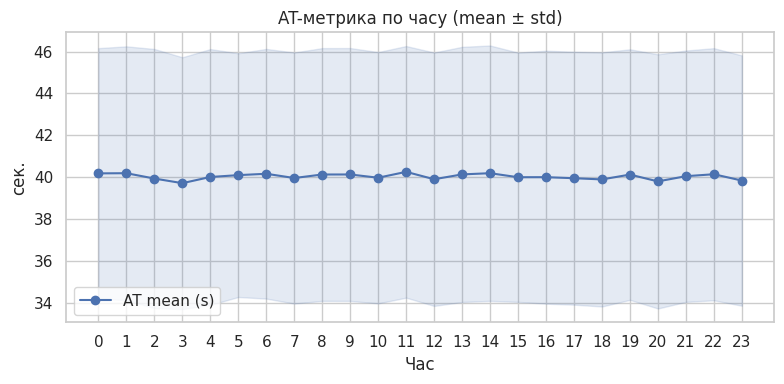

/tmp/ipython-input-1558729961.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='AT_s', data=df, order=range(0, 24), palette='Set2')


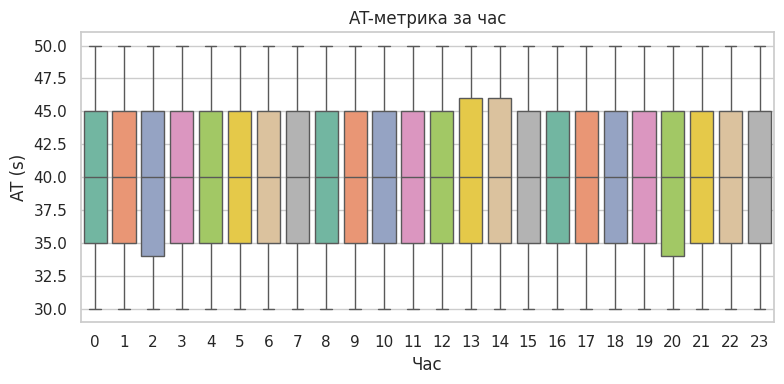

In [359]:
### Твоё решение здесь
plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['AT_s_mean'],
         marker='o', color='C0', label='AT mean (s)')
plt.fill_between(hourly['hour'],
                 hourly['AT_s_mean'] - hourly['AT_s_std'],
                 hourly['AT_s_mean'] + hourly['AT_s_std'],
                 color='C0', alpha=0.15)
plt.xlabel('Час');
plt.ylabel('сек.');
plt.title('AT-метрика по часу (mean ± std)');
plt.xticks(range(0,24)); plt.legend();
plt.tight_layout();
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='hour', y='AT_s', data=df, order=range(0, 24), palette='Set2')
plt.xlabel('Час'); plt.ylabel('AT (s)'); plt.title('AT-метрика за час'); plt.tight_layout(); plt.show()

### **Визуализируй ETA по часам**

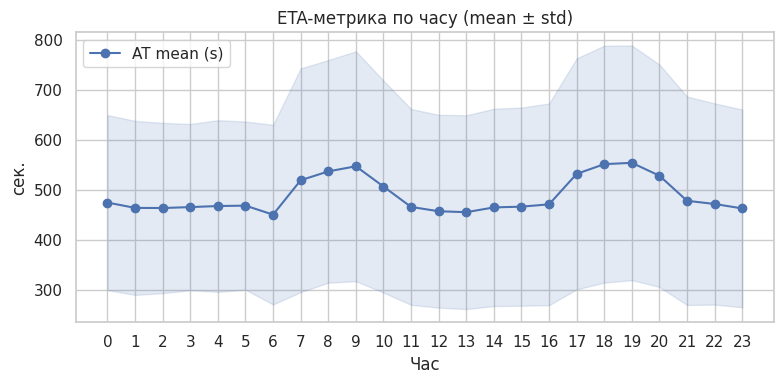

/tmp/ipython-input-3506884789.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='ETA_s', data=df, order=range(0,24), palette='Set2')


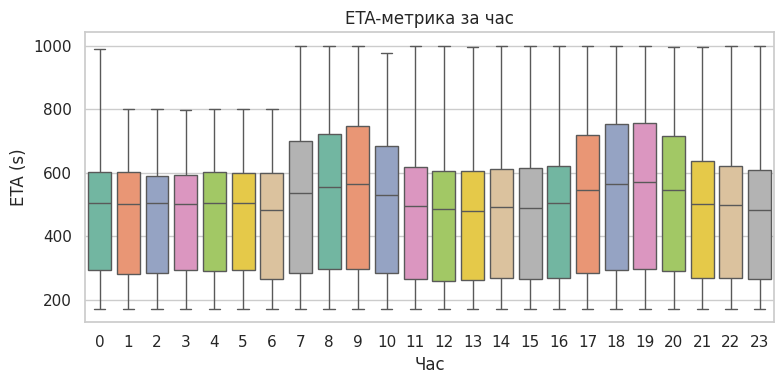

In [360]:
### Твоё решение здесь
plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['ETA_s_mean'],
         marker='o', color='C0', label='AT mean (s)')
plt.fill_between(hourly['hour'],
                 hourly['ETA_s_mean'] - hourly['ETA_s_std'],
                 hourly['ETA_s_mean'] + hourly['ETA_s_std'],
                 color='C0', alpha=0.15)
plt.xlabel('Час');
plt.ylabel('сек.');
plt.title('ETA-метрика по часу (mean ± std)');
plt.xticks(range(0,24)); plt.legend();
plt.tight_layout();
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='hour', y='ETA_s', data=df, order=range(0,24), palette='Set2')
plt.xlabel('Час'); plt.ylabel('ETA (s)');
plt.title('ETA-метрика за час'); plt.tight_layout(); plt.show()

### **Визуализируй Trip Time по часам**

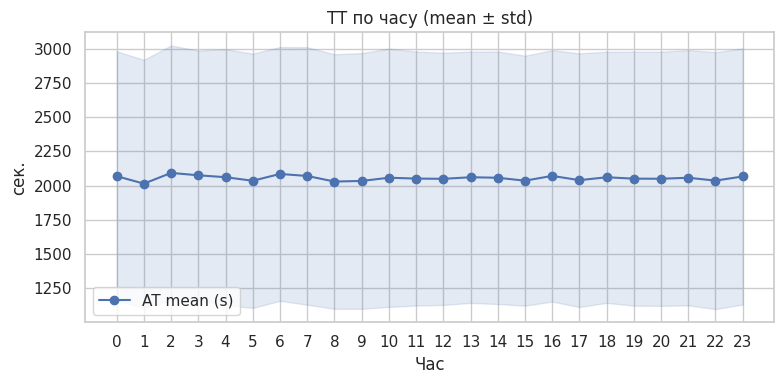

/tmp/ipython-input-3011032939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hour', y='TT_s', data=df, order=range(0,24), palette='Set2')


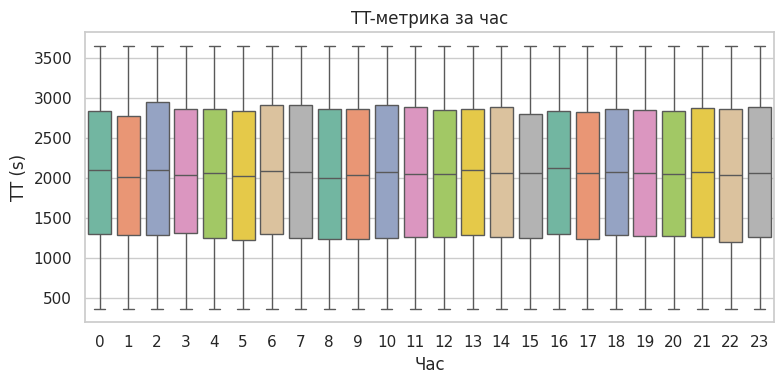

In [361]:
### Твоё решение здесь
plt.figure(figsize=(8,4))
plt.plot(hourly['hour'], hourly['TT_s_mean'],
         marker='o', color='C0', label='AT mean (s)')
plt.fill_between(hourly['hour'],
                 hourly['TT_s_mean'] - hourly['TT_s_std'],
                 hourly['TT_s_mean'] + hourly['TT_s_std'],
                 color='C0', alpha=0.15)
plt.xlabel('Час');
plt.ylabel('сек.');
plt.title('TT по часу (mean ± std)');
plt.xticks(range(0,24)); plt.legend();
plt.tight_layout();
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='hour', y='TT_s', data=df, order=range(0,24), palette='Set2')
plt.xlabel('Час'); plt.ylabel('TT (s)');
plt.title('TT-метрика за час'); plt.tight_layout(); plt.show()


## Статистическая значимость просадок

Дана функция, которая берёт на вход:

 - Две сравниваемые выборки;
 - Уровень значимости, который по умолчанию равен $5\%$. Менять его значение нет необходимости.

Функция рассчитывает статистическую значимость разности средних в двух выборках.

На выходе функция выдаёт True или False в зависимости от значимости разницы средних, а также "принтит" результаты.

С помощью данной функции необходимо оценить, были ли статистически значимые просадки метрик в моменты, которые в предыдущем задани были оценены как "проблемные".

In [362]:
from scipy import stats

def t_test_two_samples(sample1, sample2, alpha=0.05):

    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var=False)

    if p_value < alpha:
        print(f"Статистически значимая разница есть (p-value: {p_value:.4f}, разница: {sample1.mean()-sample2.mean():.4f}, A: {sample1.mean():.4f}, B: {sample2.mean():.4f})")
        return True
    else:
        print(f"Статистически значимой разницы нет (p-value: {p_value:.4f}, разница: {sample1.mean()-sample2.mean():.4f}, A: {sample1.mean():.4f}, B: {sample2.mean():.4f})")
        return False

### Значимость ad hoc просадки

Из визуального анализа видем, что 8 марта -- потенциальный день на проверку, поскольку наблюдаются выбросы в распределении, что в этот день наибольшие проблемы наблюдаются.

По часам имеет смыыл провериь утренние часы (8-9 часа утра) и вечерние(18-19)

In [363]:
# Использует вашу t_test_two_samples(sample1, sample2, alpha=0.05)
def check_ad_hoc_period(df, metric_col, problem_mask, baseline_mask=None, alpha=0.05):
    """
    df: DataFrame
    metric_col: строка, например 'ETA_s'
    problem_mask: булева маска для problem (df[...] == ...)
    baseline_mask: булева маска для baseline; если None — используется df[~problem_mask]
    """
    if baseline_mask is None:
        baseline_mask = ~problem_mask

    sample_problem = df.loc[problem_mask, metric_col].dropna()
    sample_baseline = df.loc[baseline_mask, metric_col].dropna()

    print(f"Problem n={len(sample_problem)}, Baseline n={len(sample_baseline)}, metric={metric_col}")
    if len(sample_problem) < 2 or len(sample_baseline) < 2:
        print("Недостаточно данных для теста.")
        return False

    return t_test_two_samples(sample_problem, sample_baseline, alpha=alpha)

In [364]:
### Твоё решение здесь
problem_day = pd.to_datetime('2025-03-01').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=1858, Baseline n=48588, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -29.1038, A: 466.3364, B: 495.4402)


True

In [365]:
### Твоё решение здесь
problem_day = pd.to_datetime('2025-03-08').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=1873, Baseline n=48573, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 130.2449, A: 619.7774, B: 489.5325)


True

In [366]:
### Твоё решение здесь
problem_day = pd.to_datetime('2025-03-17').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=2146, Baseline n=48300, metric=ETA_s
Статистически значимой разницы нет (p-value: 0.1814, разница: -6.3475, A: 488.2908, B: 494.6383)


False

In [367]:
problem_day = pd.to_datetime('2025-03-23').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=1693, Baseline n=48753, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0039, разница: -14.7279, A: 480.1347, B: 494.8626)


True

In [368]:
### Твоё решение здесь
problem_day = pd.to_datetime('2025-03-26').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=1586, Baseline n=48860, metric=ETA_s
Статистически значимой разницы нет (p-value: 0.0840, разница: -8.8600, A: 485.7869, B: 494.6468)


False

In [369]:
problem_day = pd.to_datetime('2025-03-30').normalize()
mask_prob = df['day_dt'] == problem_day
check_ad_hoc_period(df, 'ETA_s', mask_prob)

Problem n=1711, Baseline n=48735, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 86.8498, A: 578.2724, B: 491.4226)


True

Проверим часы

In [370]:
# Проверка всех часов для метрик
for hour in range(24):
  mask_prob = df['hour'] == hour
  check_ad_hoc_period(df, 'DST_s', mask_prob)
  check_ad_hoc_period(df, 'AT_s', mask_prob)
  check_ad_hoc_period(df, 'ETA_s', mask_prob)
  check_ad_hoc_period(df, 'TT_s', mask_prob)
  print("\n")

Problem n=1566, Baseline n=48880, metric=DST_s
Статистически значимая разница есть (p-value: 0.0000, разница: -41.6948, A: 81.4719, B: 123.1667)
Problem n=1566, Baseline n=48880, metric=AT_s
Статистически значимой разницы нет (p-value: 0.3081, разница: 0.1568, A: 40.1737, B: 40.0169)
Problem n=1566, Baseline n=48880, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -20.1114, A: 474.8812, B: 494.9926)
Problem n=1566, Baseline n=48880, metric=TT_s
Статистически значимой разницы нет (p-value: 0.5072, разница: 15.5606, A: 2069.4930, B: 2053.9324)


Problem n=1511, Baseline n=48935, metric=DST_s
Статистически значимая разница есть (p-value: 0.0000, разница: -47.0023, A: 76.2780, B: 123.2802)
Problem n=1511, Baseline n=48935, metric=AT_s
Статистически значимой разницы нет (p-value: 0.2972, разница: 0.1651, A: 40.1820, B: 40.0169)
Problem n=1511, Baseline n=48935, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -31.1232, A: 464.1774, B: 4

Проверим одновременно значимость дня и часа

In [371]:
mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 8)
check_ad_hoc_period(df, 'TT_s', mask_prob)

mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 9)
check_ad_hoc_period(df, 'TT_s', mask_prob)


mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 14)
check_ad_hoc_period(df, 'TT_s', mask_prob)


mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 15)
check_ad_hoc_period(df, 'TT_s', mask_prob)


mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 18)
check_ad_hoc_period(df, 'TT_s', mask_prob)


mask_prob = (df['day_dt'] == problem_day) & (df['hour'] == 19)
check_ad_hoc_period(df, 'TT_s', mask_prob)

Problem n=75, Baseline n=50371, metric=TT_s
Статистически значимой разницы нет (p-value: 0.9180, разница: -11.5126, A: 2042.9200, B: 2054.4326)
Problem n=66, Baseline n=50380, metric=TT_s
Статистически значимой разницы нет (p-value: 0.8237, разница: -24.0530, A: 2030.3939, B: 2054.4469)
Problem n=80, Baseline n=50366, metric=TT_s
Статистически значимой разницы нет (p-value: 0.4332, разница: 80.3745, A: 2134.6625, B: 2054.2880)
Problem n=81, Baseline n=50365, metric=TT_s
Статистически значимой разницы нет (p-value: 0.9452, разница: 7.0403, A: 2061.4444, B: 2054.4041)
Problem n=113, Baseline n=50333, metric=TT_s
Статистически значимой разницы нет (p-value: 0.1771, разница: 113.3872, A: 2167.5487, B: 2054.1615)
Problem n=109, Baseline n=50337, metric=TT_s
Статистически значимой разницы нет (p-value: 0.5735, разница: -50.3224, A: 2004.2018, B: 2054.5242)


False

### Значимость сезонной просадки

In [372]:
def check_seasonal_hour(df, metric_col, problem_day_dt, problem_hour, alpha=0.05, exclude_problem_day=True):
    """
    Сравнивает выборку metric_col для (problem_day_dt, problem_hour) с выборкой того же hour в другие дни.
    """
    mask_prob = (df['day_dt'] == pd.to_datetime(problem_day_dt).normalize()) & (df['hour'] == problem_hour)
    # baseline: тот же час в другие дни (по умолчанию исключаем сам problem_day)
    mask_base = (df['hour'] == problem_hour)
    if exclude_problem_day:
        mask_base = mask_base & (df['day_dt'] != pd.to_datetime(problem_day_dt).normalize())

    sample_prob = df.loc[mask_prob, metric_col].dropna()
    sample_base = df.loc[mask_base, metric_col].dropna()

    print(f"Seasonal hour check: day={problem_day_dt}, hour={problem_hour}, metric={metric_col}")
    print(f"Problem n={len(sample_prob)}, Baseline (same hour other days) n={len(sample_base)}")
    if len(sample_prob) < 2 or len(sample_base) < 2:
        print("Недостаточно данных для теста.")
        return False
    return t_test_two_samples(sample_prob, sample_base, alpha=alpha)

In [373]:
### Твоё решение здесь
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 8)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 9)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 14)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 15)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 18)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-08', 19)
print("\n")

check_seasonal_hour(df, 'ETA_s', '2025-03-01', 8)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-01', 9)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-01', 14)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-01', 15)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-01', 18)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-01', 19)
print("\n")

check_seasonal_hour(df, 'ETA_s', '2025-03-23', 8)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-23', 9)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-23', 14)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-23', 15)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-23', 18)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-23', 19)
print("\n")

check_seasonal_hour(df, 'ETA_s', '2025-03-30', 8)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-30', 9)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-30', 14)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-30', 15)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-30', 18)
print("\n")
check_seasonal_hour(df, 'ETA_s', '2025-03-30', 19)
print("\n")

Seasonal hour check: day=2025-03-08, hour=8, metric=ETA_s
Problem n=72, Baseline (same hour other days) n=2596
Статистически значимой разницы нет (p-value: 0.5069, разница: 16.9925, A: 553.9028, B: 536.9102)


Seasonal hour check: day=2025-03-08, hour=9, metric=ETA_s
Problem n=62, Baseline (same hour other days) n=2612
Статистически значимой разницы нет (p-value: 0.0638, разница: -56.2260, A: 492.7097, B: 548.9357)


Seasonal hour check: day=2025-03-08, hour=14, metric=ETA_s
Problem n=98, Baseline (same hour other days) n=1958
Статистически значимая разница есть (p-value: 0.0000, разница: 221.1907, A: 675.7959, B: 454.6052)


Seasonal hour check: day=2025-03-08, hour=15, metric=ETA_s
Problem n=91, Baseline (same hour other days) n=1947
Статистически значимая разница есть (p-value: 0.0000, разница: 250.5486, A: 706.0330, B: 455.4843)


Seasonal hour check: day=2025-03-08, hour=18, metric=ETA_s
Problem n=102, Baseline (same hour other days) n=2589
Статистически значимая разница есть (p-v

Теперь проверим недельную тенденцию

In [374]:
# Проверка дня в неделю
def check_seasonal_weekday(df, metric_col, problem_day_dt, alpha=0.05):
    wd = pd.to_datetime(problem_day_dt).weekday()  # 0=Mon
    mask_prob = df['day_dt'] == pd.to_datetime(problem_day_dt).normalize()
    mask_base = df['day_dt'].dt.weekday == wd
    mask_base = mask_base & (df['day_dt'] != pd.to_datetime(problem_day_dt).normalize())
    print(f"Weekday check (weekday={wd})")
    return check_ad_hoc_period(df, metric_col, mask_prob, baseline_mask=mask_base, alpha=alpha)

In [375]:
check_seasonal_weekday(df, 'ETA_s', '2025-03-08', 8)
check_seasonal_weekday(df, 'ETA_s', '2025-03-08', 9)
check_seasonal_weekday(df, 'ETA_s', '2025-03-08', 18)
check_seasonal_weekday(df, 'ETA_s', '2025-03-08', 19)

check_seasonal_weekday(df, 'ETA_s', '2025-03-01', 8)
check_seasonal_weekday(df, 'ETA_s', '2025-03-01', 9)
check_seasonal_weekday(df, 'ETA_s', '2025-03-01', 18)
check_seasonal_weekday(df, 'ETA_s', '2025-03-01', 19)

check_seasonal_weekday(df, 'ETA_s', '2025-03-23', 8)
check_seasonal_weekday(df, 'ETA_s', '2025-03-23', 9)
check_seasonal_weekday(df, 'ETA_s', '2025-03-23', 18)
check_seasonal_weekday(df, 'ETA_s', '2025-03-23', 19)

check_seasonal_weekday(df, 'ETA_s', '2025-03-30', 8)
check_seasonal_weekday(df, 'ETA_s', '2025-03-30', 9)
check_seasonal_weekday(df, 'ETA_s', '2025-03-30', 18)
check_seasonal_weekday(df, 'ETA_s', '2025-03-30', 19)

Weekday check (weekday=5)
Problem n=1873, Baseline n=6948, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 133.3345, A: 619.7774, B: 486.4429)
Weekday check (weekday=5)
Problem n=1873, Baseline n=6948, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 133.3345, A: 619.7774, B: 486.4429)
Weekday check (weekday=5)
Problem n=1873, Baseline n=6948, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 133.3345, A: 619.7774, B: 486.4429)
Weekday check (weekday=5)
Problem n=1873, Baseline n=6948, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: 133.3345, A: 619.7774, B: 486.4429)
Weekday check (weekday=5)
Problem n=1858, Baseline n=6963, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -61.3378, A: 466.3364, B: 527.6741)
Weekday check (weekday=5)
Problem n=1858, Baseline n=6963, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -61.3378, 

True

## (Бонус) Факторный анализ количества поездок

$$Trips = Orders \cdot conv $$

Необходимо сравнить часы пик и обычные часы с точки зрения количества результирующих поездок и выручки.

 - Рассчитайте количество (среднечасовое, например) заказов в двух сегментах;
 - Рассчитайте конверсию из заказа в поездку в двух сегментах;
 - С помощью формул факторного анализа рассчитайте вклад двух мультипликативных факторов в модель;

In [376]:
def factor_analysis_peak_vs_normal(df, peak_hours, metric_label='Trips'):
    # 1) собираем per-hour-per-day таблицу
    hourly = df.groupby(['day_dt','hour']).agg(
        orders=('id_order','count'),
        trips=('flag_trip','sum')
    ).reset_index()
    hourly['conv'] = hourly['trips'] / hourly['orders']

    # сегментация
    hourly['segment'] = hourly['hour'].apply(lambda h: 'peak' if h in peak_hours else 'normal')

    # агрегаты: способ A (mean per-hour)
    agg = hourly.groupby('segment').agg(
        mean_orders = ('orders','mean'),
        mean_conv   = ('conv','mean'),
        total_orders = ('orders','sum'),
        total_trips  = ('trips','sum'),
        n_hours      = ('orders','count')
    ).reset_index()
    # доделка: Trips_model = mean_orders * mean_conv
    agg['model_trips_meanprod'] = agg['mean_orders'] * agg['mean_conv']
    agg['actual_trips_per_hour'] = agg['total_trips'] / agg['n_hours']

    print("Aggregates (per-hour average):")
    print(agg)

    # факторный разложение: разница peak - normal
    peak = agg.loc[agg['segment']=='peak'].iloc[0]
    norm = agg.loc[agg['segment']=='normal'].iloc[0]

    Orders_p, Orders_n = peak['mean_orders'], norm['mean_orders']
    Conv_p, Conv_n = peak['mean_conv'],   norm['mean_conv']
    Trips_p = Orders_p * Conv_p
    Trips_n = Orders_n * Conv_n
    delta_trips = Trips_p - Trips_n

    # разбивка на эффекты (приближённая аддитивная декомпозиция)
    effect_orders = (Orders_p - Orders_n) * Conv_n
    effect_conv   = Orders_n * (Conv_p - Conv_n)
    interaction   = (Orders_p - Orders_n) * (Conv_p - Conv_n)  # перекрёстный эффект
    # процентные вклады
    def pct(x): return 100.0 * x / delta_trips if delta_trips != 0 else np.nan

    print("\nFactor decomposition (mean-orders * mean-conv):")
    print(f"Trips_peak={Trips_p:.3f}, Trips_norm={Trips_n:.3f}, ΔTrips={delta_trips:.3f}")
    print(f"Effect due to Orders change: {effect_orders:.3f} ({pct(effect_orders):.1f}%)")
    print(f"Effect due to Conv change:   {effect_conv:.3f} ({pct(effect_conv):.1f}%)")
    print(f"Interaction term:            {interaction:.3f} ({pct(interaction):.1f}%)")

    # дополнительно: разложение по total (без усреднений) — способ B
    tot_orders_p = peak['total_orders'] = hourly.loc[hourly['segment']=='peak','orders'].sum()
    tot_trips_p  = peak['total_trips']  = hourly.loc[hourly['segment']=='peak','trips'].sum()
    tot_orders_n = norm['total_orders'] = hourly.loc[hourly['segment']=='normal','orders'].sum()
    tot_trips_n  = norm['total_trips']  = hourly.loc[hourly['segment']=='normal','trips'].sum()
    conv_tot_p = tot_trips_p / tot_orders_p
    conv_tot_n = tot_trips_n / tot_orders_n
    trips_tot_p = tot_orders_p * conv_tot_p
    trips_tot_n = tot_orders_n * conv_tot_n
    delta_tot = trips_tot_p - trips_tot_n
    effect_orders_tot = (tot_orders_p - tot_orders_n) * conv_tot_n
    effect_conv_tot   = tot_orders_n * (conv_tot_p - conv_tot_n)
    interaction_tot   = (tot_orders_p - tot_orders_n) * (conv_tot_p - conv_tot_n)

    print("\nFactor decomposition (total orders * total conv):")
    print(f"tot_trips_peak={tot_trips_p}, tot_trips_norm={tot_trips_n}, Δ={delta_tot}")
    print(f"orders effect: {effect_orders_tot}, conv effect: {effect_conv_tot}, interaction: {interaction_tot}")

    return agg, {
        'delta_trips_meanprod': delta_trips,
        'orders_effect_meanprod': effect_orders,
        'conv_effect_meanprod': effect_conv,
        'interaction_meanprod': interaction,
        'delta_trips_total': delta_tot,
        'orders_effect_total': effect_orders_tot,
        'conv_effect_total': effect_conv_tot,
        'interaction_total': interaction_tot
    }

In [377]:
### Твоё решение здесь
peak_hours = [8,9,18,19]  # типичная утр/веч пик
agg, decomposition = factor_analysis_peak_vs_normal(df, peak_hours)

Aggregates (per-hour average):
  segment  mean_orders  mean_conv  total_orders  total_trips  n_hours  \
0  normal    63.861514        1.0         39658        39658      621   
1    peak    87.000000        1.0         10788        10788      124   

   model_trips_meanprod  actual_trips_per_hour  
0             63.861514              63.861514  
1             87.000000              87.000000  

Factor decomposition (mean-orders * mean-conv):
Trips_peak=87.000, Trips_norm=63.862, ΔTrips=23.138
Effect due to Orders change: 23.138 (100.0%)
Effect due to Conv change:   0.000 (0.0%)
Interaction term:            0.000 (0.0%)

Factor decomposition (total orders * total conv):
tot_trips_peak=10788, tot_trips_norm=39658, Δ=-28870.0
orders effect: -28870.0, conv effect: 0.0, interaction: -0.0


In [378]:
metrics = ['DST_s','AT_s','ETA_s','TT_s']
daily_issues = [pd.to_datetime('2025-03-03').normalize(), pd.to_datetime('2025-03-07').normalize()]
hourly_issues = [(pd.to_datetime('2025-03-07').normalize(), 18), ]  # (day, hour)

# daily checks (compare day vs other days)
for d in daily_issues:
    print("=== Checking day", d.date(), "===")
    for m in metrics:
        mask = df['day_dt'] == d
        print("Metric:", m)
        check_ad_hoc_period(df, m, mask)

# hourly checks (compare that hour on that day vs same hour other days)
for (d,h) in hourly_issues:
    print("=== Checking day-hour", d.date(), "hour", h, "===")
    for m in metrics:
        print("Metric:", m)
        check_seasonal_hour(df, m, d, h)

=== Checking day 2025-03-03 ===
Metric: DST_s
Problem n=2042, Baseline n=48404, metric=DST_s
Статистически значимой разницы нет (p-value: 0.3374, разница: 4.0726, A: 125.7801, B: 121.7075)
Metric: AT_s
Problem n=2042, Baseline n=48404, metric=AT_s
Статистически значимой разницы нет (p-value: 0.3466, разница: -0.1279, A: 39.8991, B: 40.0270)
Metric: ETA_s
Problem n=2042, Baseline n=48404, metric=ETA_s
Статистически значимая разница есть (p-value: 0.0000, разница: -23.6008, A: 471.7228, B: 495.3236)
Metric: TT_s
Problem n=2042, Baseline n=48404, metric=TT_s
Статистически значимая разница есть (p-value: 0.0287, разница: -46.3780, A: 2009.9148, B: 2056.2928)
=== Checking day 2025-03-07 ===
Metric: DST_s
Problem n=1398, Baseline n=49048, metric=DST_s
Статистически значимая разница есть (p-value: 0.0068, разница: -12.9752, A: 109.2568, B: 122.2320)
Metric: AT_s
Problem n=1398, Baseline n=49048, metric=AT_s
Статистически значимой разницы нет (p-value: 0.1906, разница: -0.2174, A: 39.8104, B: 

# Задание 2. Гео сегментация

Напиши функцию, с помощью которой можно отфильтровать заказы, находящиеся в определенном радиусе относительно точки центра.

Аргументы функции:

 - *df_loc* - датафрейм, в котором должны быть поля *lat* и *long*
 - center lat и center_long - координаты центра окружности
 - radius_degrees - радиус (в градусах)

Функция возвращает отфильтрованный датафрейм, в котором остаются только строки, координаты которых попадают в круг.

Для расчёта расстояния между точками $(x_0, y_0)$ и $(x_1, y_1)$ воспользуйся формулой:

$$d = \sqrt{(x_0-x_1)^2+(y_0-y_1)^2}$$

In [379]:
df.head()

,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,...,TT,DST_s,AT_s,ETA_s,TT_s,day,day_dt,day_of_month,day_idx,hour
0,ORD000001,CL15248,55.911191,37.641922,2025-03-01 07:08:47,2025-03-01 07:09:17,2025-03-01 07:09:47,2025-03-01 07:13:00,2025-03-01 07:33:55,normal,...,20:55,30.0,30.0,193.0,1255.0,2025-03-01,2025-03-01,1,1,7
1,ORD000002,CL18211,55.706958,37.615656,2025-03-01 06:45:41,2025-03-01 06:46:11,2025-03-01 06:46:46,2025-03-01 06:51:24,2025-03-01 07:20:37,normal,...,29:13,30.0,35.0,278.0,1753.0,2025-03-01,2025-03-01,1,1,6
2,ORD000003,CL24808,55.920046,37.860554,2025-03-01 10:06:05,2025-03-01 10:06:35,2025-03-01 10:07:19,2025-03-01 10:12:26,2025-03-01 10:26:57,normal,...,14:31,30.0,44.0,307.0,871.0,2025-03-01,2025-03-01,1,1,10
3,ORD000004,CL06620,55.898731,37.694480,2025-03-01 20:39:56,2025-03-01 20:40:27,2025-03-01 20:41:06,2025-03-01 20:44:16,2025-03-01 21:06:09,normal,...,21:53,31.0,39.0,190.0,1313.0,2025-03-01,2025-03-01,1,1,20
4,ORD000005,CL47785,55.608433,37.755467,2025-03-01 11:10:23,2025-03-01 11:10:53,2025-03-01 11:11:42,2025-03-01 11:15:15,2025-03-01 11:57:42,normal,...,42:27,30.0,49.0,213.0,2547.0,2025-03-01,2025-03-01,1,1,11


In [380]:
from typing import Tuple

In [381]:
### Твоё решение здесь
def centered_df_filtered(df_loc: pd.DataFrame, CENTER: Tuple[float, float], radius_degrees=0.01) -> pd.DataFrame:
  lat_diff = df_loc['lat'].astype(float) - CENTER[0]
  long_diff = df_loc['long'].astype(float) - CENTER[1]
  dist = np.sqrt(lat_diff**2 + long_diff**2)

  mask = dist <= float(radius_degrees)

  out = df_loc.loc[mask].copy()
  out['dist_deg'] = dist.loc[mask].values
  return out

Даны координаты специальных зон и значения их радиусов.

In [382]:
### Аэропорты
VKO_CENTER = (55.5915, 37.2613)
SVO_CENTER = (55.9726, 37.4146)
DME_CENTER = (55.4143, 37.9005)
ZONE_RADIUS_AER = 0.025

In [383]:
### Зеленоград
ZELENOGRAD_CENTER = (55.9825, 37.1814)
ZONE_RADIUS_ZEL = 0.045

In [384]:
### Ажиотажные зоны
VDNH_CENTER = (55.8251, 37.6387)
GORKY_PARK_CENTER = (55.7280, 37.5987)
SPECIAL_ZONE_RADIUS = 0.015

## Разметка специальных зон и событий

1. Создай в датафрейме столбец zone. Разметь в нём три уникальных значения:
 - *zelenograd* - Зеленоград;
 - *airports* - все три аэпорта вместе;
 - *regular* - остальные заказы;

2. Создай в датафрейме столбец special_event. Разметь в нём три уникальных значения:
 - *vdnh* - ВДНХ (только в ажиотажные часы 22.03 с 16 до 22);
 - *pg* - Парк Горького (только в ажиотажные часы 30.03 с 14 до 23);
 - *regular* - остальные заказы;

In [385]:
# Напишем функцию для удобного подсчета радиуса по строке
def dist_to_center(df_loc, center):
  return np.sqrt((df_loc['lat'].astype(float) - center[0])**2 + (df_loc['long'].astype(float) - center[1])**2)

In [386]:
### Твоё решение здесь
# Остальные потом пометим
df['zone'] = 'regular'

# Зеленоград
mask_zel = dist_to_center(df, ZELENOGRAD_CENTER) <= ZONE_RADIUS_ZEL
df.loc[mask_zel, 'zone'] = 'zelenograd'

# Аэропорты
mask_vko = dist_to_center(df, VKO_CENTER) <= ZONE_RADIUS_AER
mask_svo = dist_to_center(df, SVO_CENTER) <= ZONE_RADIUS_AER
mask_dme = dist_to_center(df, DME_CENTER) <= ZONE_RADIUS_AER
mask_air = (mask_vko | mask_svo | mask_dme) & (~mask_zel)
df.loc[mask_air, 'zone'] = 'airports'

# Проверим, есть ли у нас потенциальные значения
df['zone'].unique()

array(['regular', 'airports', 'zelenograd'], dtype=object)

In [387]:
df.head()

,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,...,DST_s,AT_s,ETA_s,TT_s,day,day_dt,day_of_month,day_idx,hour,zone
0,ORD000001,CL15248,55.911191,37.641922,2025-03-01 07:08:47,2025-03-01 07:09:17,2025-03-01 07:09:47,2025-03-01 07:13:00,2025-03-01 07:33:55,normal,...,30.0,30.0,193.0,1255.0,2025-03-01,2025-03-01,1,1,7,regular
1,ORD000002,CL18211,55.706958,37.615656,2025-03-01 06:45:41,2025-03-01 06:46:11,2025-03-01 06:46:46,2025-03-01 06:51:24,2025-03-01 07:20:37,normal,...,30.0,35.0,278.0,1753.0,2025-03-01,2025-03-01,1,1,6,regular
2,ORD000003,CL24808,55.920046,37.860554,2025-03-01 10:06:05,2025-03-01 10:06:35,2025-03-01 10:07:19,2025-03-01 10:12:26,2025-03-01 10:26:57,normal,...,30.0,44.0,307.0,871.0,2025-03-01,2025-03-01,1,1,10,regular
3,ORD000004,CL06620,55.898731,37.694480,2025-03-01 20:39:56,2025-03-01 20:40:27,2025-03-01 20:41:06,2025-03-01 20:44:16,2025-03-01 21:06:09,normal,...,31.0,39.0,190.0,1313.0,2025-03-01,2025-03-01,1,1,20,regular
4,ORD000005,CL47785,55.608433,37.755467,2025-03-01 11:10:23,2025-03-01 11:10:53,2025-03-01 11:11:42,2025-03-01 11:15:15,2025-03-01 11:57:42,normal,...,30.0,49.0,213.0,2547.0,2025-03-01,2025-03-01,1,1,11,regular


In [388]:
# Теперь по special event
df['special_event'] = 'regular'

# Заведем спецальную переменную для колонки дня
dt_col = 'offer_dttm'
df[dt_col] = pd.to_datetime(df[dt_col])
# print(df[dt_col])

# начнем с ВДНХ: только в ажиотажные часы 22.03 с 16 до 22
vdnh_day = pd.to_datetime(f"2025-03-22").normalize()
vdnh_start = vdnh_day + pd.Timedelta(hours=16)
vdnh_end = vdnh_day + pd.Timedelta(hours=22)
mask_time_vdnh = (df[dt_col] >= vdnh_start) & (df[dt_col] <= vdnh_end)
mask_center_vdnh = dist_to_center(df, VDNH_CENTER) <= SPECIAL_ZONE_RADIUS
mask_vdnh = mask_time_vdnh & mask_center_vdnh
df.loc[mask_vdnh, 'special_event'] = 'vdnh'

pg_day = pd.to_datetime(f"2025-03-30").normalize()
pg_start = pg_day + pd.Timedelta(hours=14)
pg_end = pg_day + pd.Timedelta(hours=23)
mask_time_pg = (df[dt_col] >= pg_start) & (df[dt_col] <= pg_end)
mask_center_pg = dist_to_center(df, GORKY_PARK_CENTER) <= SPECIAL_ZONE_RADIUS
mask_pg = mask_time_pg & mask_center_pg
df.loc[mask_pg, 'special_event'] = 'pg'

# Проверим корректность преобразования
df['special_event'].unique()


array(['regular', 'vdnh', 'pg'], dtype=object)

In [389]:
df.head()

,id_order,id_client,lat,long,order_dttm,offer_dttm,assign_dttm,arrive_dttm,trip_dttm,label,...,AT_s,ETA_s,TT_s,day,day_dt,day_of_month,day_idx,hour,zone,special_event
0,ORD000001,CL15248,55.911191,37.641922,2025-03-01 07:08:47,2025-03-01 07:09:17,2025-03-01 07:09:47,2025-03-01 07:13:00,2025-03-01 07:33:55,normal,...,30.0,193.0,1255.0,2025-03-01,2025-03-01,1,1,7,regular,regular
1,ORD000002,CL18211,55.706958,37.615656,2025-03-01 06:45:41,2025-03-01 06:46:11,2025-03-01 06:46:46,2025-03-01 06:51:24,2025-03-01 07:20:37,normal,...,35.0,278.0,1753.0,2025-03-01,2025-03-01,1,1,6,regular,regular
2,ORD000003,CL24808,55.920046,37.860554,2025-03-01 10:06:05,2025-03-01 10:06:35,2025-03-01 10:07:19,2025-03-01 10:12:26,2025-03-01 10:26:57,normal,...,44.0,307.0,871.0,2025-03-01,2025-03-01,1,1,10,regular,regular
3,ORD000004,CL06620,55.898731,37.694480,2025-03-01 20:39:56,2025-03-01 20:40:27,2025-03-01 20:41:06,2025-03-01 20:44:16,2025-03-01 21:06:09,normal,...,39.0,190.0,1313.0,2025-03-01,2025-03-01,1,1,20,regular,regular
4,ORD000005,CL47785,55.608433,37.755467,2025-03-01 11:10:23,2025-03-01 11:10:53,2025-03-01 11:11:42,2025-03-01 11:15:15,2025-03-01 11:57:42,normal,...,49.0,213.0,2547.0,2025-03-01,2025-03-01,1,1,11,regular,regular


In [390]:
# Проверим метрики
df_air_vko = centered_df_filtered(df, VKO_CENTER, radius_degrees=ZONE_RADIUS_AER)
df[['lat','long','zone','special_event']].head()
df['zone'].value_counts()
df['special_event'].value_counts()

,count
special_event,
regular,49954
pg,342
vdnh,150


## Визуализация метрик по зонам

### Визуализируй конверсии по дням в разбивке по зонам

Построй график конверсий в разбивке по зонам:
- Order2Trip
- Order2Offer
- Offer2Assign
- Assign2Arrive
- Arrive2Trip

Сделай выводы о работе воронки в особых зонах.

In [391]:
df.columns

Index(['id_order', 'id_client', 'lat', 'long', 'order_dttm', 'offer_dttm',
       'assign_dttm', 'arrive_dttm', 'trip_dttm', 'label', 'flag_offer',
       'flag_assign', 'flag_arrive', 'flag_trip', 'DST', 'AT', 'ETA', 'TT',
       'DST_s', 'AT_s', 'ETA_s', 'TT_s', 'day', 'day_dt', 'day_of_month',
       'day_idx', 'hour', 'zone', 'special_event'],
      dtype='object')

In [392]:
### Твоё решение здесь
# Подготовим метрики
group = df.groupby(['day_dt', 'zone']).agg(
    orders=('id_order', 'count'),
    offers=('flag_offer', 'sum'),
    assigns=('flag_assign', 'sum'),
    arrives=('flag_arrive', 'sum'),
    trips=('flag_trip', 'sum'),
    DST_s_mean=('DST_s', 'mean'),
    DST_s_median=('DST_s', 'median'),
    AT_s_mean=('AT_s', 'mean'),
    ETA_s_mean=('ETA_s', 'mean'),
    TT_s_mean=('TT_s', 'mean'),
).reset_index()

# Добавим конверсии
group['order2offer'] = np.where(group['orders']>0, group['offers']/group['orders'], np.nan)
group['offer2assign'] = np.where(group['offers']>0, group['assigns']/group['offers'], np.nan)
group['assign2arrive'] = np.where(group['assigns']>0, group['arrives']/group['assigns'], np.nan)
group['arrive2trip'] = np.where(group['arrives']>0, group['trips']/group['arrives'], np.nan)
group['order2trip'] = np.where(group['orders']>0, group['trips']/group['orders'], np.nan)

# для пивота
conv_metrics = ['order2trip','order2offer','offer2assign','assign2arrive','arrive2trip']
time_metrics = ['DST_s_mean','AT_s_mean','ETA_s_mean']

### Визуализируй временные метрики по дням в разбивке по зонам

Построй временные метрики в разбивке по зонам:
- DST
- Assign Time
- ETA

Сделай выводы о работе воронки в особых зонах

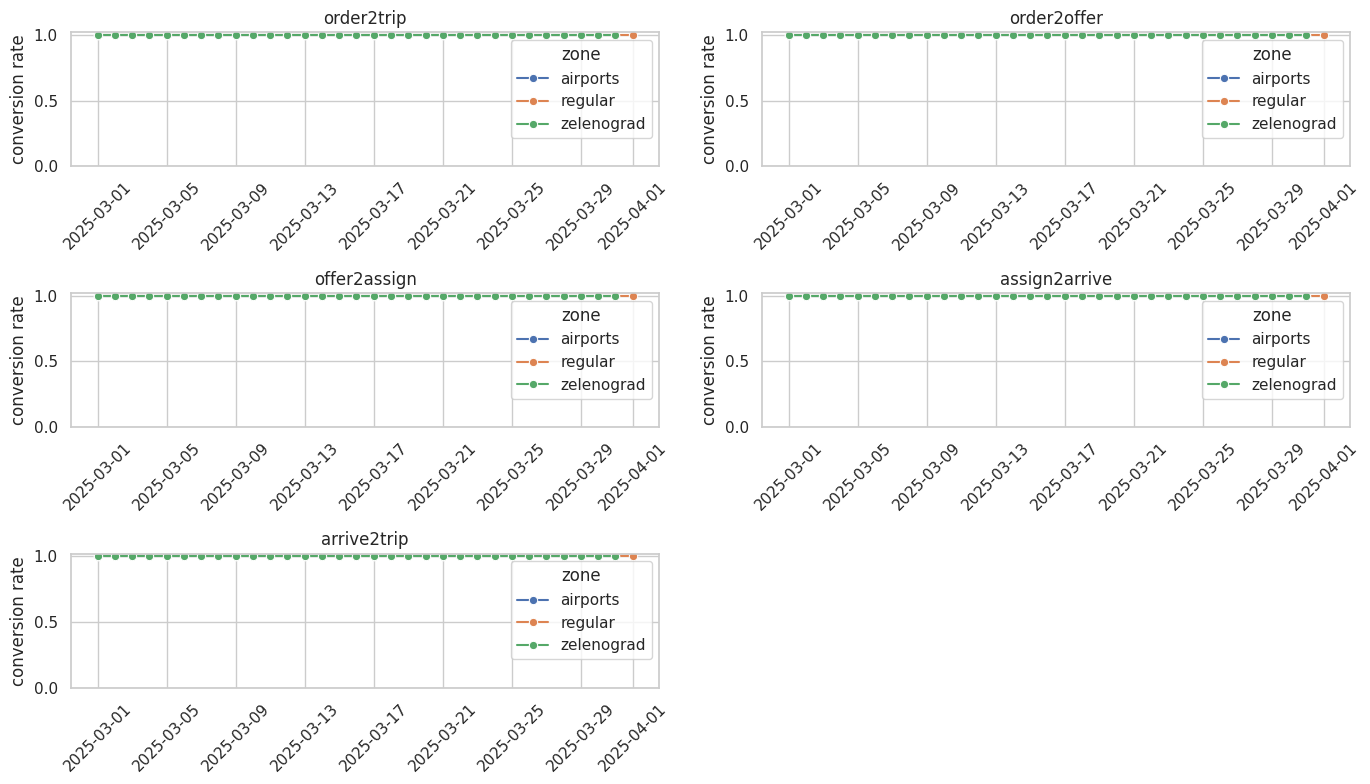

In [393]:
### Твоё решение здесь
# Сами метрики
plt.figure(figsize=(14,8))
for i, metric in enumerate(conv_metrics, 1):
    plt.subplot(3,2,i)
    # seaborn lineplot: x=day_dt, y=metric, hue=zone
    sns.lineplot(data=group, x='day_dt', y=metric, hue='zone', marker='o')
    plt.title(metric)
    plt.ylabel('conversion rate')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.ylim(0,1.02)
plt.tight_layout()
plt.show()

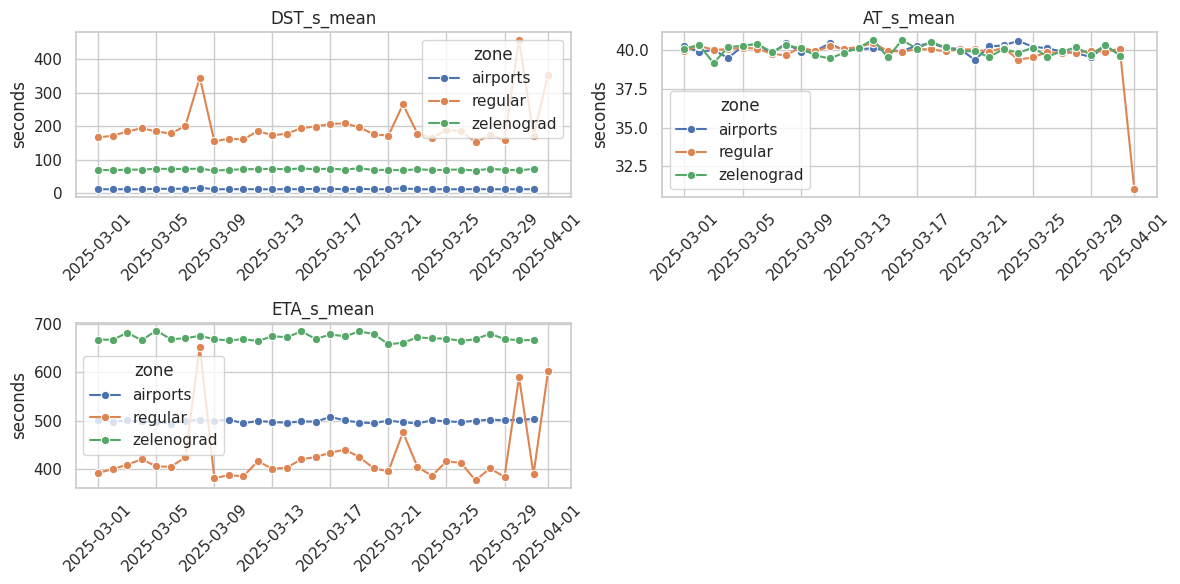

In [394]:
# Зоны
plt.figure(figsize=(12,6))
for i, metric in enumerate(time_metrics,1):
    plt.subplot(2,2,i)
    sns.lineplot(data=group, x='day_dt', y=metric, hue='zone', marker='o')
    plt.title(metric)
    plt.ylabel('seconds')
    plt.xlabel('')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Влияние событий ажиотажа

Рассчитай значения всех метрик в зонах и временных интервалах ожиотажа (ВДНХ и Парк Горького).

Рассчитай статистическую значимость просадок.

In [395]:
### Твоё решение здесь
# определим функцию, которая для каждого события и зоны считает метрики и делает t-test
events = ['vdnh','pg']
zones = df['zone'].unique().tolist()
metrics_binary = {'order2offer':'flag_offer','offer2assign':'flag_assign','assign2arrive':'flag_arrive','arrive2trip':'flag_trip','order2trip':'flag_trip'}
# note: for order2trip compare flag_trip by order; for other conversions use corresponding flag arrays per order
time_cols = ['DST_s','AT_s','ETA_s','TT_s']

results = []

for ev in events:
    for zone in zones:
        mask_ev = (df['special_event']==ev) & (df['zone']==zone)
        mask_base= (df['special_event']=='regular') & (df['zone']==zone)
        n_ev = mask_ev.sum()
        n_base = mask_base.sum()
        if n_ev < 2 or n_base < 2:
            # недостаточно данных
            continue

        # conversion tests: test flag arrays per order
        for conv_name, flag_col in metrics_binary.items():
            # sample A = flags in event, sample B = flags in baseline
            sA = df.loc[mask_ev, flag_col].dropna()
            sB = df.loc[mask_base, flag_col].dropna()
            print("\n")
            print("Event",ev,"Zone",zone,"Metric",conv_name)
            t_test_two_samples(sA, sB)

        # time metrics tests (mean differences)
        for tcol in time_cols:
            sA = df.loc[mask_ev, tcol].dropna()
            sB = df.loc[mask_base, tcol].dropna()
            print("\n")
            print("Event",ev,"Zone",zone,"Time",tcol)
            t_test_two_samples(sA, sB)



Event vdnh Zone regular Metric order2offer
Статистически значимой разницы нет (p-value: nan, разница: 0.0000, A: 1.0000, B: 1.0000)


Event vdnh Zone regular Metric offer2assign
Статистически значимой разницы нет (p-value: nan, разница: 0.0000, A: 1.0000, B: 1.0000)


Event vdnh Zone regular Metric assign2arrive
Статистически значимой разницы нет (p-value: nan, разница: 0.0000, A: 1.0000, B: 1.0000)


Event vdnh Zone regular Metric arrive2trip
Статистически значимой разницы нет (p-value: nan, разница: 0.0000, A: 1.0000, B: 1.0000)


Event vdnh Zone regular Metric order2trip
Статистически значимой разницы нет (p-value: nan, разница: 0.0000, A: 1.0000, B: 1.0000)


Event vdnh Zone regular Time DST_s
Статистически значимая разница есть (p-value: 0.0000, разница: 453.4572, A: 644.7133, B: 191.2561)


Event vdnh Zone regular Time AT_s
Статистически значимой разницы нет (p-value: 0.0821, разница: -0.8882, A: 39.1133, B: 40.0015)


Event vdnh Zone regular Time ETA_s
Статистически значимая р

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


### Рассчитай средние значения метрик для зон ажиотажа

In [396]:
### Твоё решение здесь
# агрегация средних в зоне+событие
agg_evt = df.groupby(['special_event','zone']).agg(
    n_orders = ('id_order','count'),
    order2offer = ('flag_offer','mean'),
    offer2assign = ('flag_assign','mean'),
    assign2arrive = ('flag_arrive','mean'),
    arrive2trip = ('flag_trip','mean'),
    DST_s_mean = ('DST_s','mean'),
    AT_s_mean  = ('AT_s','mean'),
    ETA_s_mean = ('ETA_s','mean'),
    TT_s_mean  = ('TT_s','mean'),
).reset_index()

# посмотрим только vdnh и pg
print(agg_evt[agg_evt['special_event'].isin(['vdnh','pg'])])

  special_event     zone  n_orders  order2offer  offer2assign  assign2arrive  \
0            pg  regular       342          1.0           1.0            1.0   
4          vdnh  regular       150          1.0           1.0            1.0   

   arrive2trip  DST_s_mean  AT_s_mean  ETA_s_mean    TT_s_mean  
0          1.0  843.187135  39.675439  847.043860  1998.058480  
4          1.0  644.713333  39.113333  800.753333  2029.253333  


### Определи стат.значимость изменений метрик во время ажиотажа

In [397]:
### Твоё решение здесь
sig_results = []

for ev in events:
    for zone in zones:
        mask_ev = (df['special_event']==ev) & (df['zone']==zone)
        mask_base= (df['special_event']=='regular') & (df['zone']==zone)
        if mask_ev.sum() < 2 or mask_base.sum() < 2:
            continue
        # conversions
        for conv_name, flag_col in metrics_binary.items():
            sA = df.loc[mask_ev, flag_col].dropna()
            sB = df.loc[mask_base, flag_col].dropna()
            # perform t-test and capture p
            t_stat, p_val = stats.ttest_ind(sA, sB, equal_var=False, nan_policy='omit')
            sig_results.append({
                'event': ev, 'zone': zone, 'metric': conv_name, 'type': 'conv', 'n_ev': len(sA), 'n_base': len(sB),
                'mean_ev': sA.mean(), 'mean_base': sB.mean(), 'pval': p_val, 'significant': (p_val < 0.05)
            })
        # times
        for tcol in time_cols:
            sA = df.loc[mask_ev, tcol].dropna()
            sB = df.loc[mask_base, tcol].dropna()
            t_stat, p_val = stats.ttest_ind(sA, sB, equal_var=False, nan_policy='omit')
            sig_results.append({
                'event': ev, 'zone': zone, 'metric': tcol, 'type': 'time', 'n_ev': len(sA), 'n_base': len(sB),
                'mean_ev': sA.mean(), 'mean_base': sB.mean(), 'pval': p_val, 'significant': (p_val < 0.05)
            })

sig_df = pd.DataFrame(sig_results)
print(sig_df.sort_values('pval').head(20))

   event     zone         metric  type  n_ev  n_base      mean_ev  \
16    pg  regular          ETA_s  time   342   25575   847.043860   
14    pg  regular          DST_s  time   342   25575   843.187135   
5   vdnh  regular          DST_s  time   150   25575   644.713333   
7   vdnh  regular          ETA_s  time   150   25575   800.753333   
6   vdnh  regular           AT_s  time   150   25575    39.113333   
15    pg  regular           AT_s  time   342   25575    39.675439   
8   vdnh  regular           TT_s  time   150   25575  2029.253333   
17    pg  regular           TT_s  time   342   25575  1998.058480   
0   vdnh  regular    order2offer  conv   150   25575     1.000000   
1   vdnh  regular   offer2assign  conv   150   25575     1.000000   
2   vdnh  regular  assign2arrive  conv   150   25575     1.000000   
3   vdnh  regular    arrive2trip  conv   150   25575     1.000000   
4   vdnh  regular     order2trip  conv   150   25575     1.000000   
9     pg  regular    order2offer  

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [398]:
# сохранить в csv при необходимости:
sig_df.to_csv('event_significance_results.csv', index=False)

## (Бонус) Влияние погоды

Воспользуйся кодом ниже, чтобы подключиться по API к архиву погоды и загрузить в датафрейм данные о дневной температуре.

Исследуй зависимость между погодой и значениями метрик.

In [399]:
import requests

url = "https://archive-api.open-meteo.com/v1/archive"
params = {
    'latitude': 59.94,
    'longitude': 30.31,
    'start_date': '2025-03-01',
    'end_date': '2025-03-31',
    'daily': 'temperature_2m_max',
    'timezone': 'Europe/Moscow'
}

response = requests.get(url, params=params)
data = response.json()

temperatures = {}
for i, date in enumerate(data['daily']['time']):
    temp = data['daily']['temperature_2m_max'][i]
    temperatures[date] = temp

In [400]:
print(type(temperatures))
print(temperatures['2025-03-01'])

<class 'dict'>
0.6


In [401]:
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################
##########################################################################################

                tmax  ETA_s_mean  DST_s_mean
tmax        1.000000    0.319751    0.210376
ETA_s_mean  0.319751    1.000000    0.794686
DST_s_mean  0.210376    0.794686    1.000000


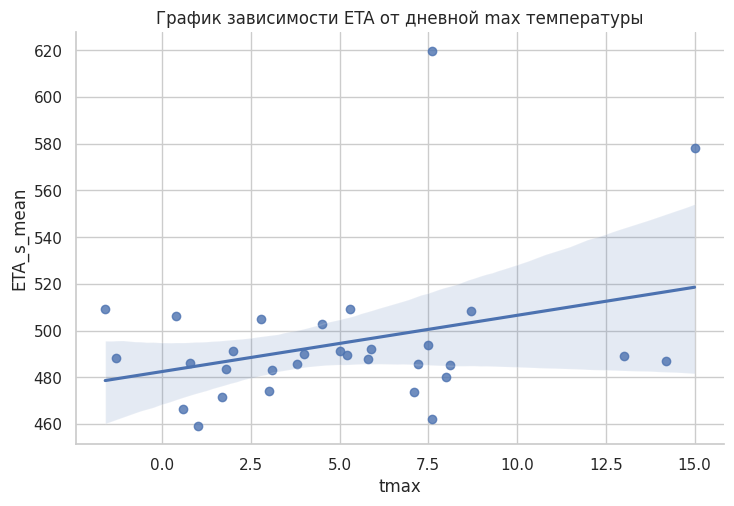

In [402]:
# пример подготовки temp_df (если у вас dict temperatures from API)
temp_df = pd.DataFrame(list(temperatures.items()), columns=['date','tmax'])
temp_df['date'] = pd.to_datetime(temp_df['date']).dt.normalize()

# daily overall metrics (без разбивки по zone)
daily_overall = df.groupby('day_dt').agg(
    orders=('id_order','count'),
    trips=('flag_trip','sum'),
    ETA_s_mean=('ETA_s','mean'),
    DST_s_mean=('DST_s','mean')
).reset_index()
daily_merged = daily_overall.merge(temp_df, left_on='day_dt', right_on='date', how='left')

# correlation
print(daily_merged[['tmax','ETA_s_mean','DST_s_mean']].corr())

# scatter + regression
sns.lmplot(data=daily_merged, x='tmax', y='ETA_s_mean', height=5, aspect=1.5)
plt.title("График зависимости ETA от дневной max температуры")
plt.show()

Расширим анализ

In [403]:
params = {
    'latitude': 59.94,
    'longitude': 30.31,
    'start_date': '2025-03-01',
    'end_date': '2025-03-31',
    'daily': [
        'temperature_2m_max',
        'temperature_2m_min',
        'precipitation_sum',
        'rain_sum',
        'snowfall_sum',
        'windspeed_10m_max'
    ],
    'timezone': 'Europe/Moscow'
}

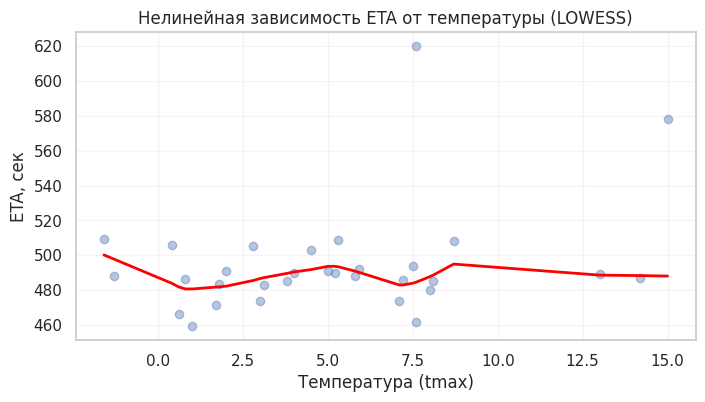

In [404]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
smooth = lowess(daily_merged['ETA_s_mean'], daily_merged['tmax'], frac=0.4)

plt.figure(figsize=(8,4))
plt.scatter(daily_merged['tmax'], daily_merged['ETA_s_mean'], alpha=0.4)
plt.plot(smooth[:,0], smooth[:,1], color='red', linewidth=2)
plt.xlabel('Температура (tmax)')
plt.ylabel('ETA, сек')
plt.title('Нелинейная зависимость ETA от температуры (LOWESS)')
plt.grid(True, alpha=0.2)
plt.show()

In [405]:
median_temp = daily_merged['tmax'].median()
cold = daily_merged[daily_merged['tmax'] <= median_temp]
warm = daily_merged[daily_merged['tmax'] > median_temp]

t_test_two_samples(cold['ETA_s_mean'], warm['ETA_s_mean'])
t_test_two_samples(cold['DST_s_mean'], warm['DST_s_mean'])

Статистически значимой разницы нет (p-value: 0.1823, разница: -15.7041, A: 487.1410, B: 502.8451)
Статистически значимой разницы нет (p-value: 0.4185, разница: -11.8615, A: 112.6927, B: 124.5542)


False

In [406]:
import statsmodels.formula.api as smf

model = smf.ols('ETA_s_mean ~ tmax + orders', data=daily_merged).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ETA_s_mean   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.610
Date:                Sun, 07 Dec 2025   Prob (F-statistic):              0.218
Time:                        01:14:36   Log-Likelihood:                -148.39
No. Observations:                  31   AIC:                             302.8
Df Residuals:                      28   BIC:                             307.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    476.0172     39.279     12.119      0.0

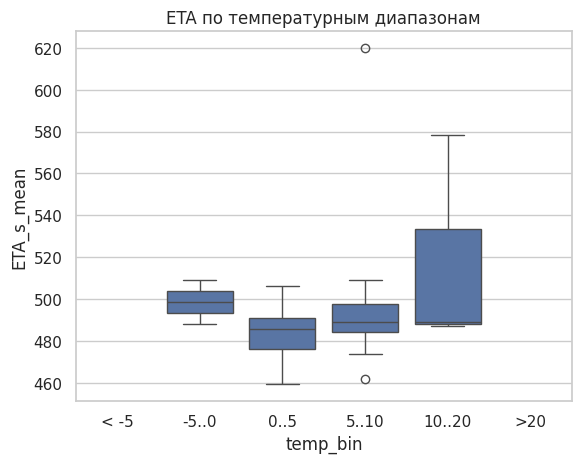

In [407]:
daily_merged['temp_bin'] = pd.cut(
    daily_merged['tmax'],
    bins=[-30, -5, 0, 5, 10, 20, 35],
    labels=['< -5', '-5..0', '0..5', '5..10', '10..20', '>20']
)

sns.boxplot(data=daily_merged, x='temp_bin', y='ETA_s_mean')
plt.title('ETA по температурным диапазонам')
plt.show()

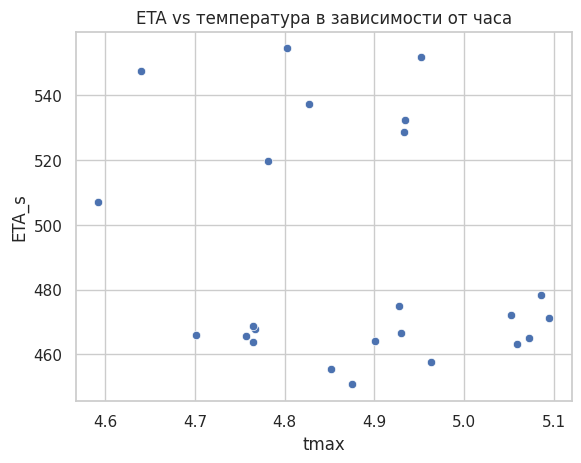

In [408]:
df_temp = df.copy()
df_temp['date'] = df_temp['day_dt'].dt.normalize()
df_temp = df_temp.merge(temp_df, on='date', how='left')

hourly_weather = (
    df_temp
    .groupby('hour')[['tmax','ETA_s']]
    .mean()
    .reset_index()
)

sns.scatterplot(data=hourly_weather, x='tmax', y='ETA_s')
plt.title('ETA vs температура в зависимости от часа')
plt.show()

Соберем файлы для Kepler

In [415]:
# 1
pickup_csv = df[['id_order','lat','long','order_dttm','flag_trip']].copy()
pickup_csv.to_csv('pickup_points.csv', index=False)

df['lat_round'] = df['lat'].round(2)
df['long_round'] = df['long'].round(2)

# 2
zone_agg = df.groupby(['lat_round','long_round']).agg(
    orders=('id_order','count'),
    trips=('flag_trip','sum')
).reset_index()

zone_agg['order2trip'] = zone_agg['trips'] / zone_agg['orders']

zone_agg.to_csv('zone_metrics.csv', index=False)

#3
def label_special_zones(df):
    def in_circle(lat, lon, c_lat, c_lon, radius_deg):
        return ((lat - c_lat)**2 + (lon - c_lon)**2)**0.5 <= radius_deg

    zones = []
    for _, row in df.iterrows():
        lat, lon = row['lat'], row['long']

        if in_circle(lat, lon, 55.9726, 37.4146, 0.025):
            zones.append('SVO')
        elif in_circle(lat, lon, 55.4143, 37.9005, 0.025):
            zones.append('DME')
        elif in_circle(lat, lon, 55.5915, 37.2613, 0.025):
            zones.append('VKO')
        elif in_circle(lat, lon, 55.9825, 37.1814, 0.045):
            zones.append('Zelenograd')
        elif in_circle(lat, lon, 55.8251, 37.6387, 0.015):
          zones.append("vdnh")
        elif in_circle(lat, lon, 55.7280, 37.5987, 0.015):
          zones.append("gp")
        else:
            zones.append('Other')

    df['zone'] = zones
    return df

df_zoned = label_special_zones(df[['id_order','lat','long','flag_trip']].copy())
df_zoned.to_csv('zones.csv', index=False)